### Data describtion:

- MSSubClass: Identifies the type of dwelling involved in the sale.
- MSZoning: Identifies the general zoning classification of the sale.
- LotFrontage: Linear feet of street connected to property.
- LotArea: Lot size in square feet.
- Street: Type of road access to property.
- Alley: Type of alley access to property.
- LotShape: General shape of property.
- LandContour: Flatness of the property.
- Utilities: Type of utilities available.
- LotConfig: Lot configuration.
- LandSlope: Slope of property.
- Neighborhood: Physical locations within Ames city limits.
- Condition1: Proximity to various conditions.
- Condition2: Proximity to various conditions (if more than one is present).
- BldgType: Type of dwelling.
- HouseStyle: Style of dwelling.
- OverallQual: Rates the overall material and finish of the house.
- OverallCond: Rates the overall condition of the house.
- YearBuilt: Original construction date.
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions).
- RoofStyle: Type of roof.
- RoofMatl: Roof material.
- Exterior1st: Exterior covering on house.
- Exterior2nd: Exterior covering on house (if more than one material).
- MasVnrType: Masonry veneer type **(None - None)**.
- MasVnrArea: Masonry veneer area in square feet.
- ExterQual: Evaluates the quality of the material on the exterior/
- ExterCond: Evaluates the present condition of the material on the exterior.
- Foundation: Type of foundation.
- BsmtQual: Evaluates the height of the basement **(NA - No Basement)**.
- BsmtCond: Evaluates the general condition of the basement **(NA - No Basement)**.
- BsmtExposure: Refers to walkout or garden level walls **(NA - No Basement)**.
- BsmtFinType1: Rating of basement finished area **(NA - No Basement)**.
- BsmtFinSF1: Type 1 finished square feet.
- BsmtFinType2: Rating of basement finished area (if multiple types) **(NA - No Basement)**.
- BsmtFinSF2: Type 2 finished square feet.
- BsmtUnfSF: Unfinished square feet of basement area.
- TotalBsmtSF: Total square feet of basement area.
- Heating: Type of heating.
- HeatingQC: Heating quality and condition.
- CentralAir: Central air conditioning.
- Electrical: Electrical system.
- 1stFlrSF: First Floor square feet.
- 2ndFlrSF: Second floor square feet.
- LowQualFinSF: Low quality finished square feet (all floors).
- GrLivArea: Above grade (ground) living area square feet.
- BsmtFullBath: Basement full bathrooms.
- BsmtHalfBath: Basement half bathrooms.
- FullBath: Full bathrooms above grade.
- HalfBath: Half baths above grade.
- Bedroom: Bedrooms above grade (does NOT include basement bedrooms).
- Kitchen: Kitchens above grade.
- KitchenQual: Kitchen quality.
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms).
- Functional: Home functionality (Assume typical unless deductions are warranted).
- Fireplaces: Number of fireplaces.
- FireplaceQu: Fireplace quality **(NA - No Fireplace)**.
- GarageType: Garage location **(NA - No Garage)**.
- GarageYrBlt: Year garage was built.
- GarageFinish: Interior finish of the garage **(NA - No Garage)**.
- GarageCars: Size of garage in car capacity.
- GarageArea: Size of garage in square feet.
- GarageQual: Garage quality **(NA - No Garage)**.
- GarageCond: Garage condition **(NA - No Garage)**.
- PavedDrive: Paved driveway.
- WoodDeckSF: Wood deck area in square feet.
- OpenPorchSF: Open porch area in square feet.
- EnclosedPorch: Enclosed porch area in square feet.
- 3SsnPorch: Three season porch area in square feet.
- ScreenPorch: Screen porch area in square feet.
- PoolArea: Pool area in square feet.
- PoolQC: Pool quality **(NA - No Pool)**.
- Fence: Fence quality **(NA - No Fence)**.
- MiscFeature: Miscellaneous feature not covered in other categories **(NA - None)**.
- MiscVal: Value of miscellaneous feature.
- MoSold: Month Sold (MM).
- YrSold: Year Sold (YYYY).
- SaleType: Type of sale.
- SaleCondition: Condition of sale.

## 1. Download the data and explore

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgbm
import xgboost as xgb
import catboost as cat

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, PowerTransformer, OneHotEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, SGDRegressor, ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
from IPython.display import display
pd.options.display.max_columns = None

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
test_ID = test['Id']

**Let's look at the data - samples, missing values, info, correlation**

In [5]:
train.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
train.shape

(1460, 81)

In [7]:
train_missing = train.isnull().sum().sort_values(ascending=False)
train_missing.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

Fill in missing values

In [8]:
train['MiscFeature'].fillna('None', inplace=True)
train['Fence'].fillna('No Fence', inplace=True)
train['PoolQC'].fillna('No Pool', inplace=True)
train['Alley'].fillna('No alley access', inplace=True)
train['FireplaceQu'].fillna('No Fireplace', inplace=True)
train['LotFrontage'].fillna(train['LotFrontage'].median(), inplace=True)
train['GarageCond'].fillna('No Garage', inplace=True)
train['GarageType'].fillna('No Garage', inplace=True)
train['GarageYrBlt'].fillna(round(train['GarageYrBlt'].median(), 1), inplace=True)
train['GarageFinish'].fillna('No Garage', inplace=True)
train['GarageQual'].fillna('No Garage', inplace=True)
train['BsmtExposure'].fillna('No Basement', inplace=True)
train['BsmtFinType2'].fillna('No Basement', inplace=True)
train['BsmtFinType1'].fillna('No Basement', inplace=True)
train['BsmtCond'].fillna('No Basement', inplace=True)
train['BsmtQual'].fillna('No Basement', inplace=True)
train['MasVnrArea'].fillna(0.0, inplace=True)
train['MasVnrType'].fillna('None', inplace=True)
train['Electrical'].fillna('Mixed', inplace=True)

Correlation

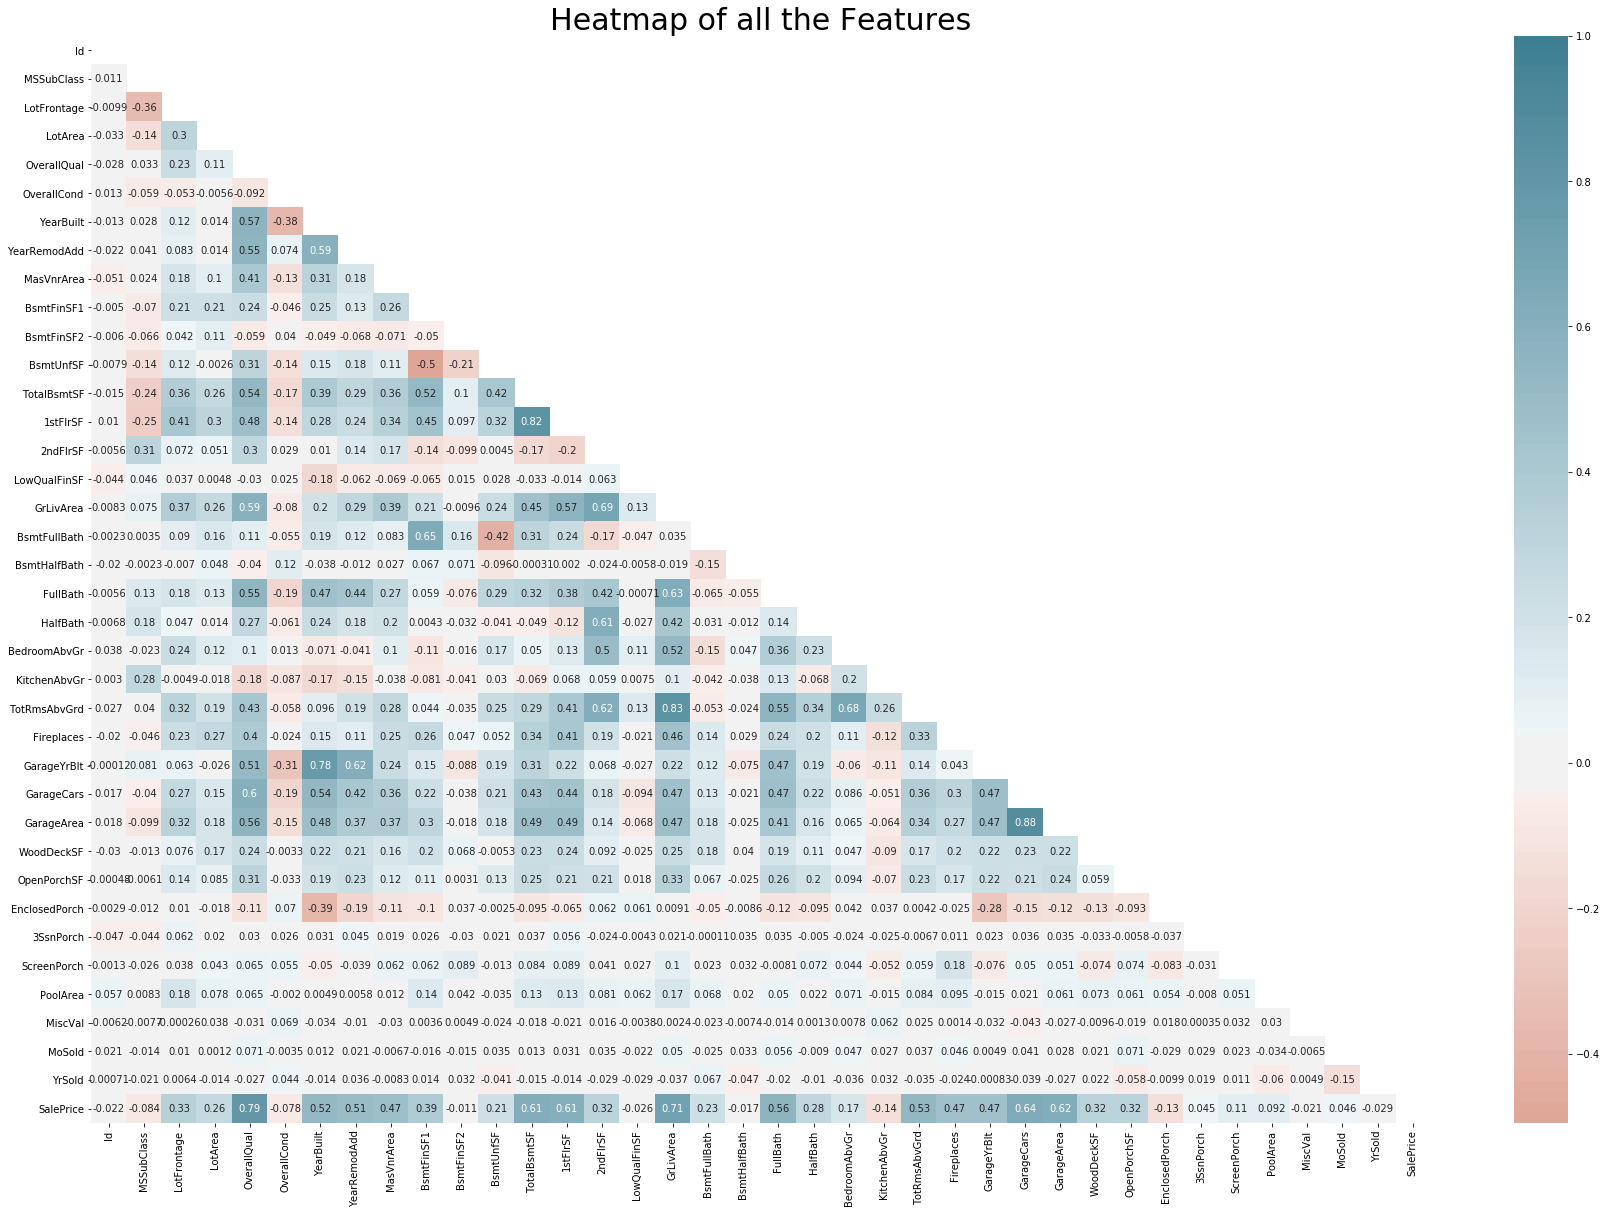

In [9]:
plt.subplots(figsize = (30,20))

mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
);

plt.title("Heatmap of all the Features", fontsize=30);

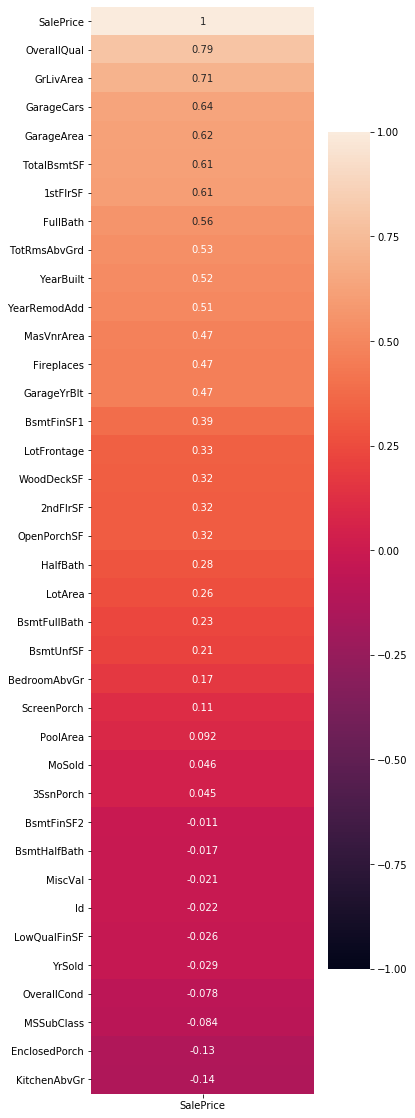

In [10]:
plt.figure(figsize=(5,20))
sns.heatmap(train.corr()[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(50), vmin=-1, annot=True);

Correlation more than 0.3

In [11]:
best_columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',\
               'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', \
               'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces', \
               'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF']

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Some feature have wrong format

In [13]:
test.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [14]:
test.shape

(1459, 80)

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [16]:
test_missing = test.isnull().sum().sort_values(ascending=False)
test_missing.head(35)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
HouseStyle         0
LandSlope          0
dtype: int64

In [17]:
test['MiscFeature'].fillna('None', inplace=True)
test['Fence'].fillna('No Fence', inplace=True)
test['PoolQC'].fillna('No Pool', inplace=True)
test['Alley'].fillna('No alley access', inplace=True)
test['FireplaceQu'].fillna('No Fireplace', inplace=True)
test['LotFrontage'].fillna(train['LotFrontage'].median(), inplace=True)
test['GarageCond'].fillna('No Garage', inplace=True)
test['GarageType'].fillna('No Garage', inplace=True)
test['GarageYrBlt'].fillna(round(test['GarageYrBlt'].median(), 1), inplace=True)
test['GarageFinish'].fillna('No Garage', inplace=True)
test['GarageQual'].fillna('No Garage', inplace=True)
test['BsmtExposure'].fillna('No Basement', inplace=True)
test['BsmtFinType2'].fillna('No Basement', inplace=True)
test['BsmtFinType1'].fillna('No Basement', inplace=True)
test['BsmtCond'].fillna('No Basement', inplace=True)
test['BsmtQual'].fillna('No Basement', inplace=True)
test['MasVnrArea'].fillna(0.0, inplace=True)
test['MasVnrType'].fillna('None', inplace=True)
test['MSZoning'].fillna('RL', inplace=True)
test['Utilities'].fillna('AllPub', inplace=True)
test['Functional'].fillna('Typ', inplace=True)
test['BsmtFullBath'].fillna(0.0, inplace=True)
test['BsmtHalfBath'].fillna(0.0, inplace=True)
test['BsmtFinSF2'].fillna(0.0, inplace=True)
test['BsmtUnfSF'].fillna(0.0, inplace=True)
test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].median(), inplace=True)
test['SaleType'].fillna('WD', inplace=True)
test['BsmtFinSF1'].fillna(0.0, inplace=True)
test['GarageCars'].fillna(2.0, inplace=True)
test['GarageArea'].fillna(0.0, inplace=True)
test['KitchenQual'].fillna('TA', inplace=True)
test['Exterior1st'].fillna('VinylSd', inplace=True)
test['Exterior2nd'].fillna('VinylSd', inplace=True)

**Concatenate train and test**

In [18]:
train_test = pd.concat([train,test], axis=0, sort=False)

In [19]:
train_test.sample(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
1038  1039         160       RM         21.0     1533   Pave  No alley access   
954   2415          90       RL         70.0     8078   Pave  No alley access   
907   2368         120       FV         40.0     3606   Pave             Pave   
776   2237          20       RL         85.0    11447   Pave  No alley access   
1255  2716         160       FV         69.0     4447   Pave  No alley access   
3        4          70       RL         60.0     9550   Pave  No alley access   
154   1615         160       RM         21.0     1476   Pave  No alley access   
119    120          60       RL         65.0     8461   Pave  No alley access   
984   2445          50       RM         50.0     5925   Pave  No alley access   
1447  1448          60       RL         80.0    10000   Pave  No alley access   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
1038      Reg         Lvl    AllPub    Inside       Gtl      MeadowV   
954       Reg         Lvl    AllPub    Inside       Gtl        NAmes   
907       Reg         Lvl    AllPub    Inside       Gtl      Somerst   
776       IR1         Lvl    AllPub    Inside       Gtl       Timber   
1255      IR1         Lvl    AllPub       FR2       Gtl      Somerst   
3         IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
154       Reg         Lvl    AllPub    Inside       Gtl      MeadowV   
119       Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
984       Reg         Lvl    AllPub    Inside       Gtl      OldTown   
1447      Reg         Lvl    AllPub    Inside       Gtl      CollgCr   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
1038       Norm       Norm    Twnhs     2Story            4            6   
954        Norm       Norm   Duplex     1Story            5            5   
907        Norm       Norm   TwnhsE     1Story            7            5   
776        Norm       Norm     1Fam     1Story            8            5   
1255       Norm       Norm   TwnhsE     2Story            7            5   
3          Norm       Norm     1Fam     2Story            7            5   
154        Norm       Norm    Twnhs     2Story            4            7   
119        Norm       Norm     1Fam     2Story            6            5   
984        Norm       Norm     1Fam     1.5Fin            4            6   
1447       Norm       Norm     1Fam     2Story            8            5   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
1038       1970          2008     Gable  CompShg     CemntBd     CmentBd   
954        1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng   
907        2006          2007     Gable  CompShg     VinylSd     VinylSd   
776        2005          2006     Gable  CompShg     VinylSd     VinylSd   
1255       2003          2003     Gable  CompShg     VinylSd     VinylSd   
3          1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
154        1970          1970     Gable  CompShg     CemntBd     CmentBd   
119        2005          2006     Gable  CompShg     VinylSd     VinylSd   
984        1900          1950     Gable  CompShg     MetalSd     MetalSd   
1447       1995          1996     Gable  CompShg     VinylSd     VinylSd   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1038       None         0.0        TA        TA     CBlock       TA       TA   
954       Stone       260.0        TA        TA     CBlock       TA       TA   
907        None         0.0        Gd        TA      PConc       Ex       Gd   
776     BrkFace       674.0        Gd        TA      PConc       Ex       TA   
1255       None         0.0        Gd        TA      PConc       Gd       TA   
3          None         0.0        TA        TA     BrkTil       TA       Gd   
154        None         0.0        TA        TA     CBlock       TA       TA   
119      

Drop irrelevant features

In [20]:
train.drop(['Id', 'Utilities', 'Street', 'LowQualFinSF', 'PoolArea'], axis=1, inplace=True)
test.drop(['Id', 'Utilities', 'Street', 'LowQualFinSF', 'PoolArea'], axis=1, inplace=True)
train_test.drop(['Id', 'Utilities', 'Street', 'LowQualFinSF', 'PoolArea'], axis=1, inplace=True)

## 2. EDA and preprocessing

In [21]:
train['MSSubClass'] = train['MSSubClass'].apply(str)
train['OverallCond'] = train['OverallCond'].astype(str)
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)
#train['GarageYrBlt'] = train['GarageYrBlt'].astype(str)

test['MSSubClass'] = test['MSSubClass'].apply(str)
test['OverallCond'] = test['OverallCond'].astype(str)
test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)
#test['GarageYrBlt'] = test['GarageYrBlt'].astype(str)

train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)
train_test['OverallCond'] = train_test['OverallCond'].astype(str)
train_test['YrSold'] = train_test['YrSold'].astype(str)
train_test['MoSold'] = train_test['MoSold'].astype(str)
#train_test['GarageYrBlt'] = train_test['GarageYrBlt'].astype(str)

In [22]:
train_test.head()

MSSubClass MSZoning  LotFrontage  LotArea            Alley LotShape  \
0         60       RL         65.0     8450  No alley access      Reg   
1         20       RL         80.0     9600  No alley access      Reg   
2         60       RL         68.0    11250  No alley access      IR1   
3         70       RL         60.0     9550  No alley access      IR1   
4         60       RL         84.0    14260  No alley access      IR1   

  LandContour LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0         Lvl    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1         Lvl       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2         Lvl    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3         Lvl    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4         Lvl       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7           5       2003          2003     Gable   
1     1Story            6           8       1976          1976     Gable   
2     2Story            7           5       2001          2002     Gable   
3     2Story            7           5       1915          1970     Gable   
4     2Story            8           5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   
3          Unf         0.0      540.0        756.0    GasA        Gd   
4          Unf         0.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0          Y      SBrkr       856       854       1710           1.0   
1          Y      SBrkr      1262         0       1262           0.0   
2          Y      SBrkr       920       866       1786           1.0   
3          Y      SBrkr       961       756       1717           1.0   
4          Y      SBrkr      1145      1053       2198           1.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0           0.0         2         1             3             1          Gd   
1           1.0         2         0             3             1          TA   
2           0.0         2         1             3             1          Gd   
3           0.0         1         0             3             1          Gd   
4           0.0         2         1             4             1          Gd   

   TotRmsAbvGrd Functional  Fireplaces   FireplaceQu GarageType  GarageYrBlt  \
0             8        Typ           0  No Fireplace     Attchd       2003.0   
1             6        Typ           1            TA     Attchd       1976.0   
2             6        Typ           1            TA     Attchd       2001.0   
3             7        Typ           1

In [23]:
columns = train.columns

In [24]:
columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

In [25]:
numeric = ['LotFrontage', 
           'LotArea',  
           'YearBuilt', 
           'YearRemodAdd',
           'MasVnrArea', 
           'BsmtFinSF1', 
           'BsmtFinSF2', 
           'BsmtUnfSF', 
           'TotalBsmtSF',
           '1stFlrSF', 
           '2ndFlrSF', 
           'GrLivArea',  
           'GarageArea', 
           'WoodDeckSF', 
           'OpenPorchSF',
           'EnclosedPorch', 
           '3SsnPorch', 
           'ScreenPorch', 
           'MiscVal', 
           'GarageYrBlt']

In [26]:
categorical = set(columns) - set(numeric)

In [27]:
sns.set_style('whitegrid')

In [28]:
def num_plot(data):
    for col in numeric:
        if col != 'SalePrice':
            print(col)
            print(data[col].dtype)
    
            plt.figure(figsize=(10, 10))
            ax = sns.scatterplot(x=col, y='SalePrice', data=data)
            plt.show();

LotFrontage
float64


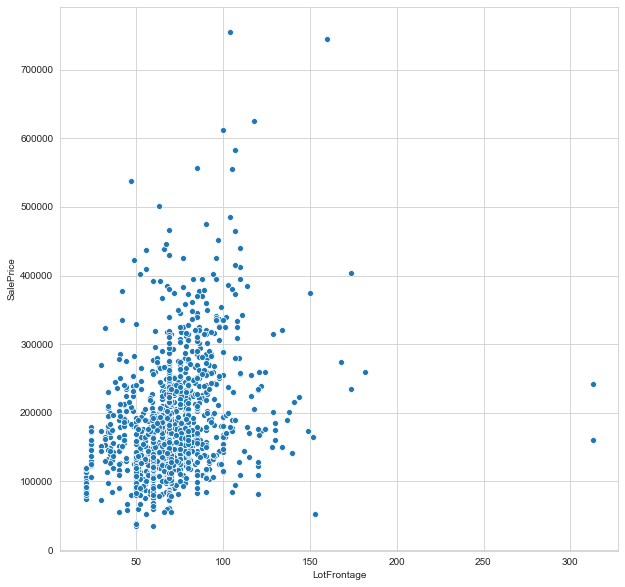

LotArea
int64


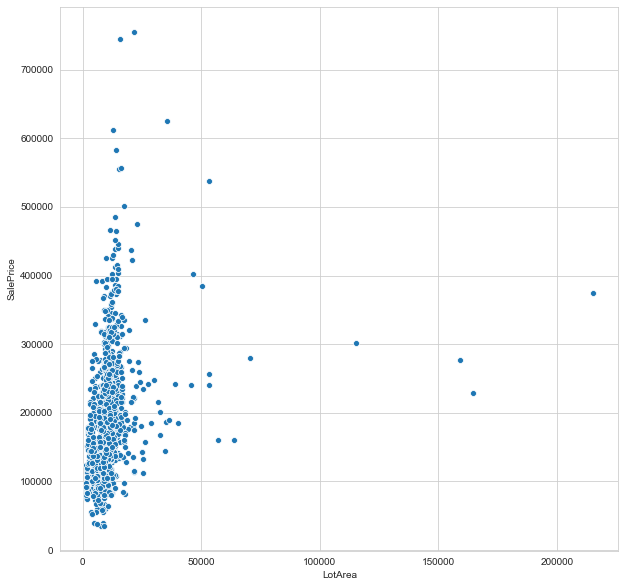

YearBuilt
int64


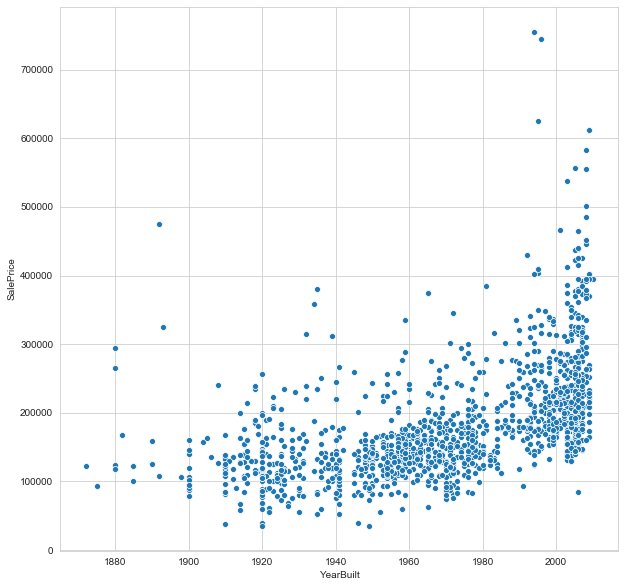

YearRemodAdd
int64


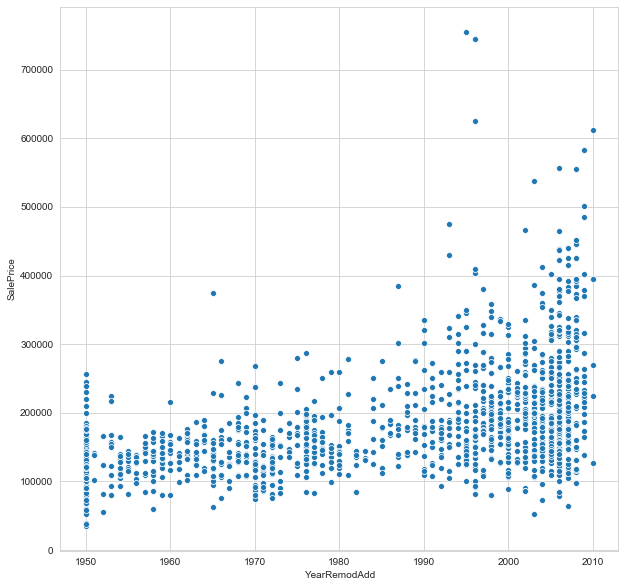

MasVnrArea
float64


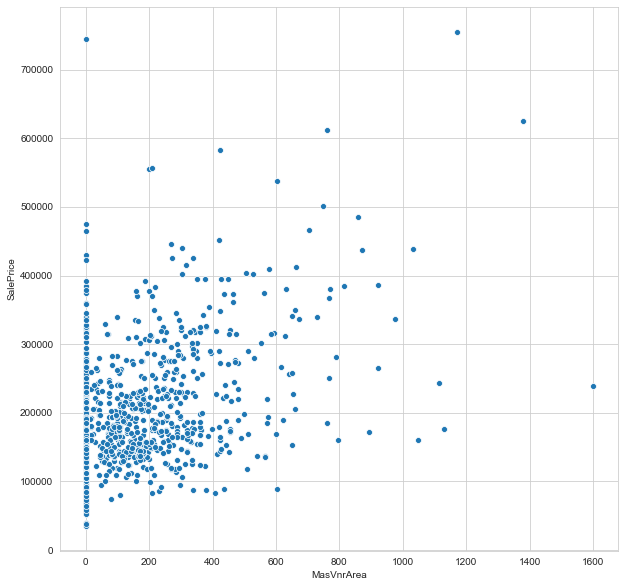

BsmtFinSF1
int64


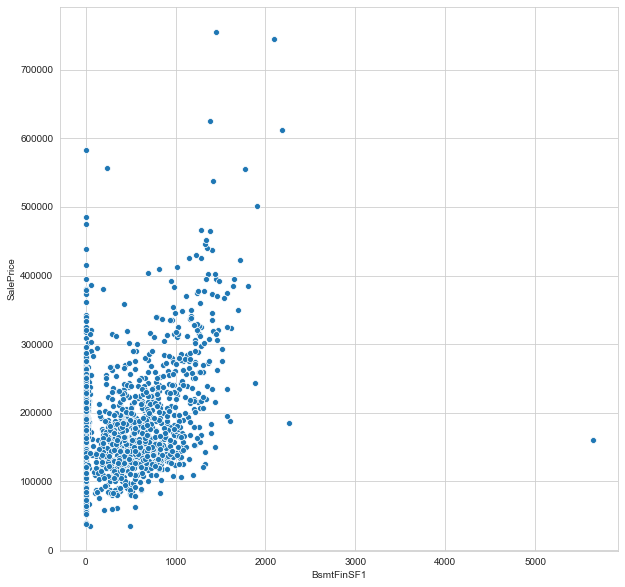

BsmtFinSF2
int64


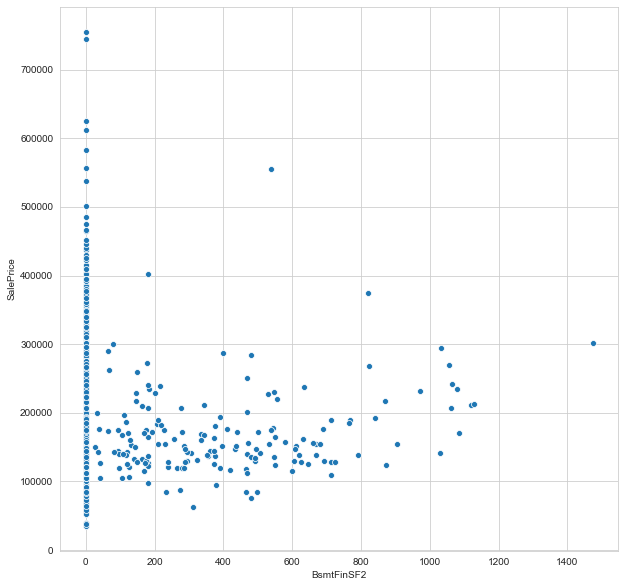

BsmtUnfSF
int64


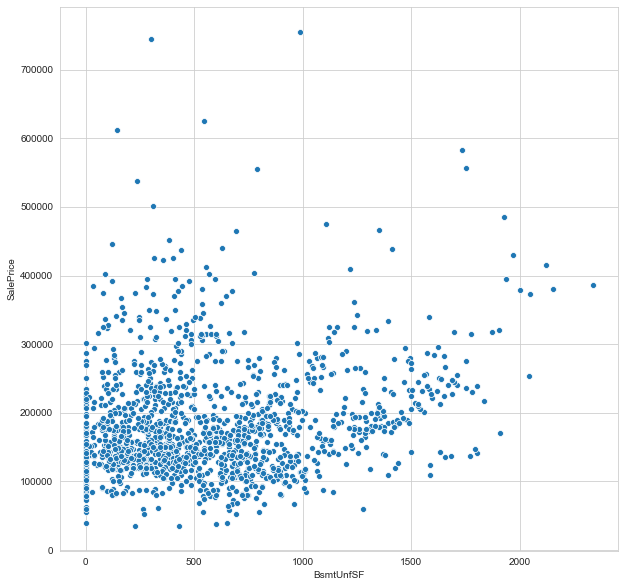

TotalBsmtSF
int64


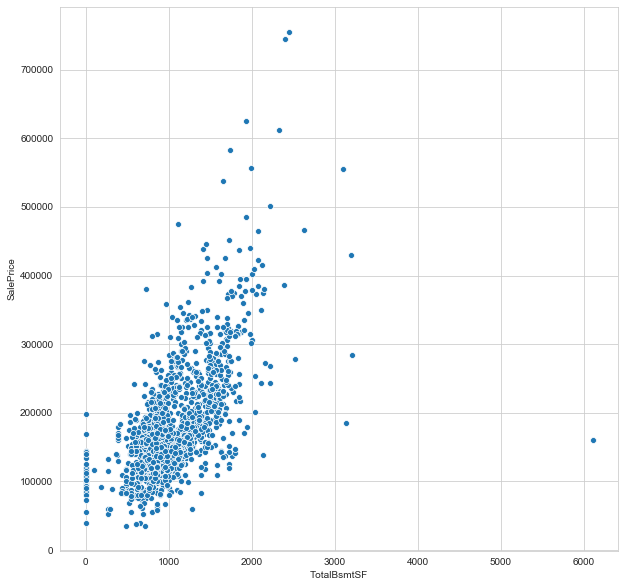

1stFlrSF
int64


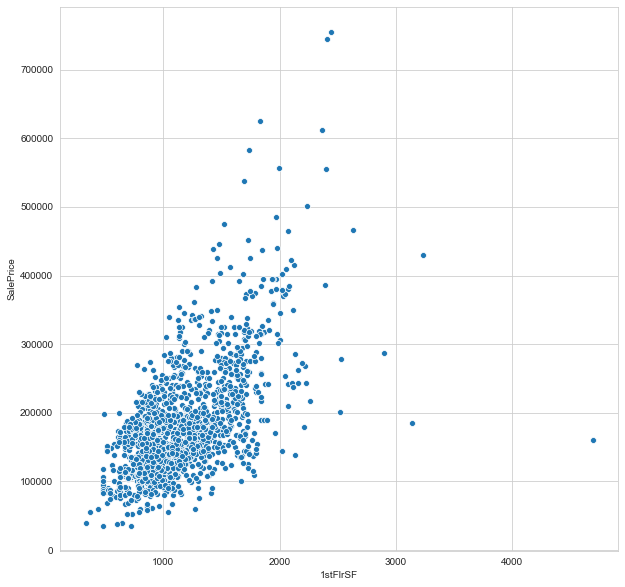

2ndFlrSF
int64


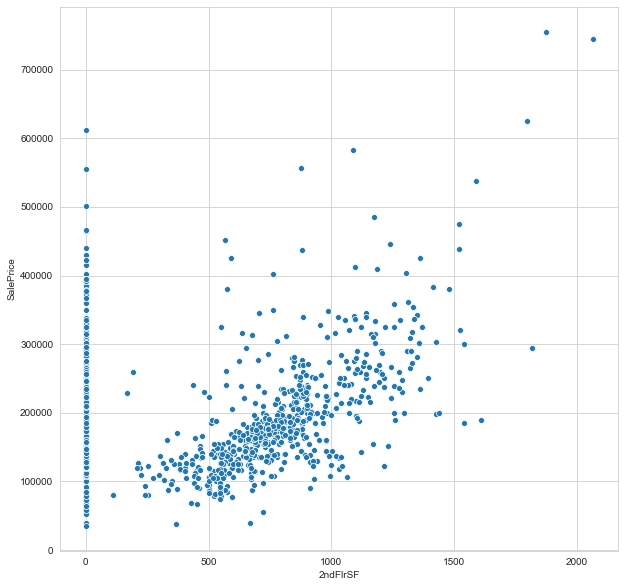

GrLivArea
int64


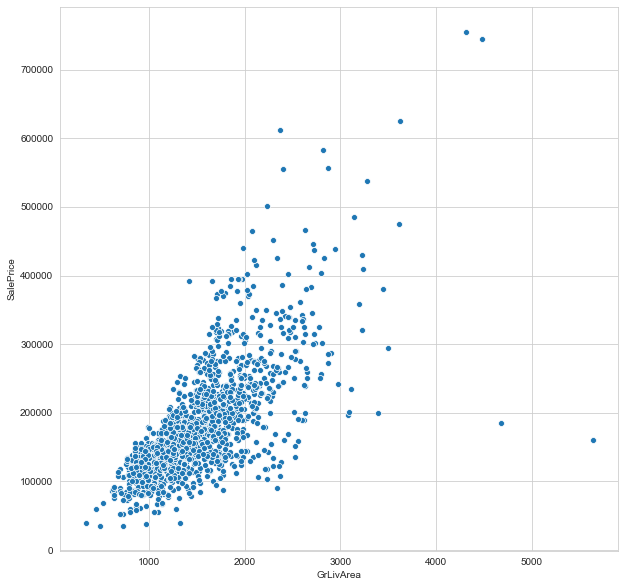

GarageArea
int64


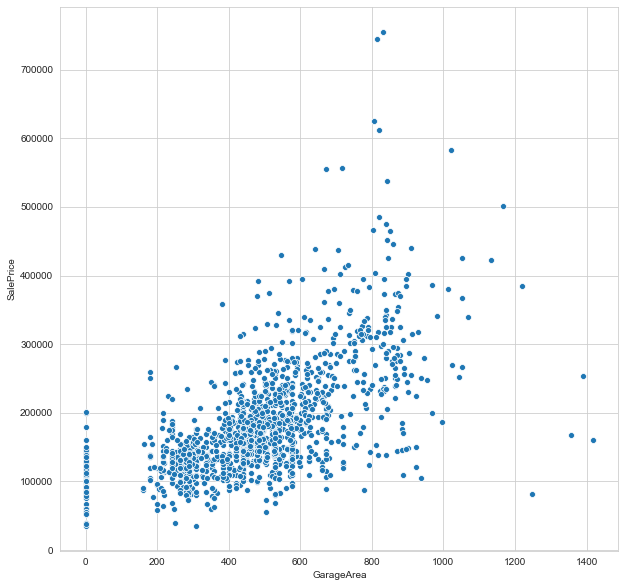

WoodDeckSF
int64


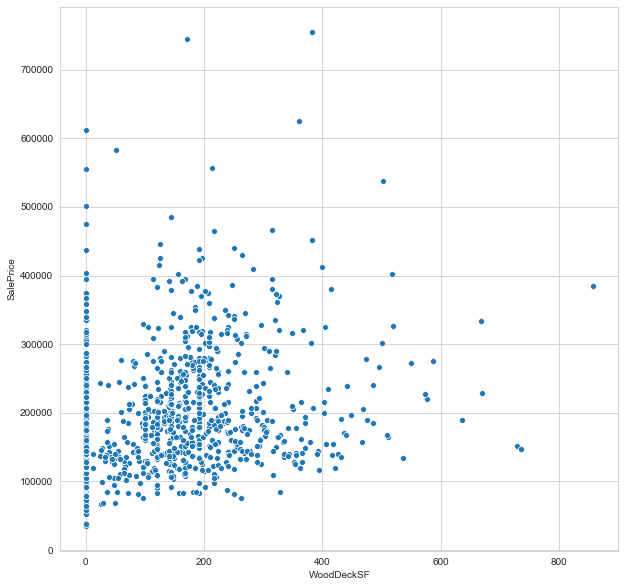

OpenPorchSF
int64


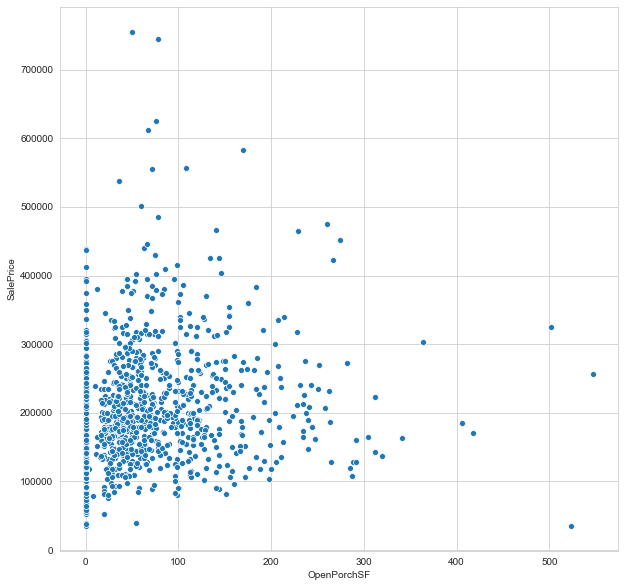

EnclosedPorch
int64


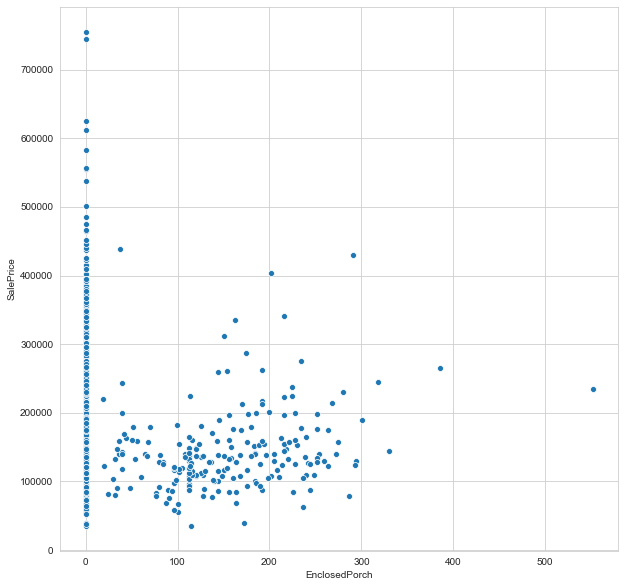

3SsnPorch
int64


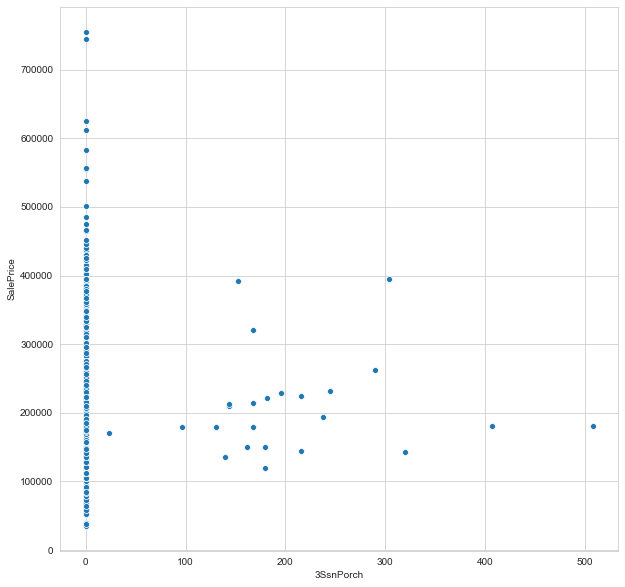

ScreenPorch
int64


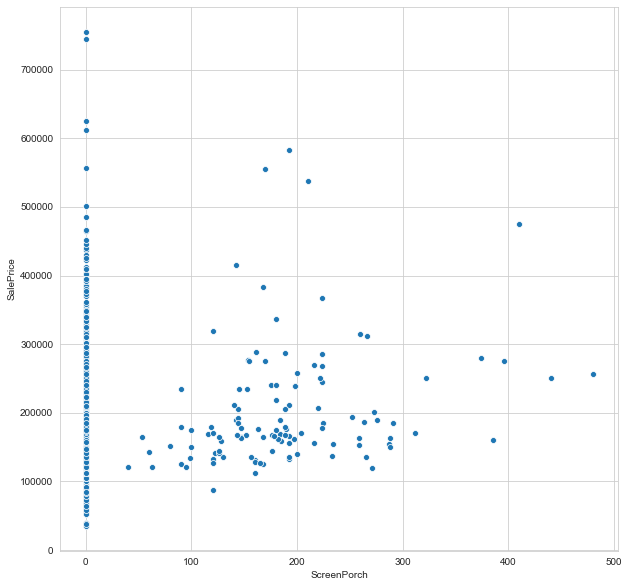

MiscVal
int64


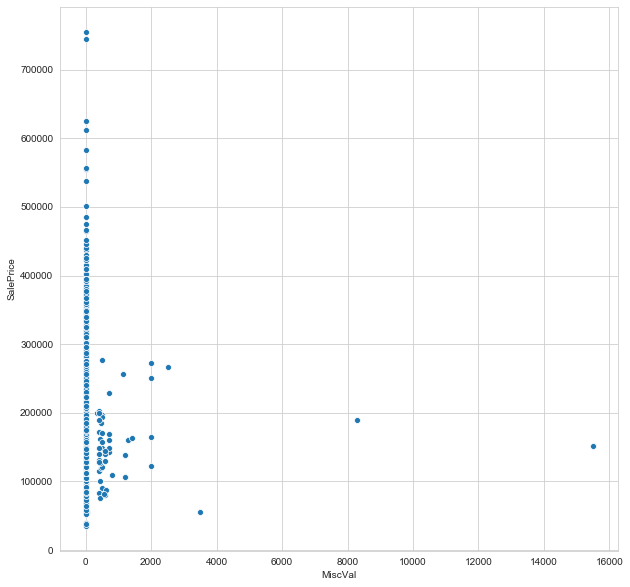

GarageYrBlt
float64


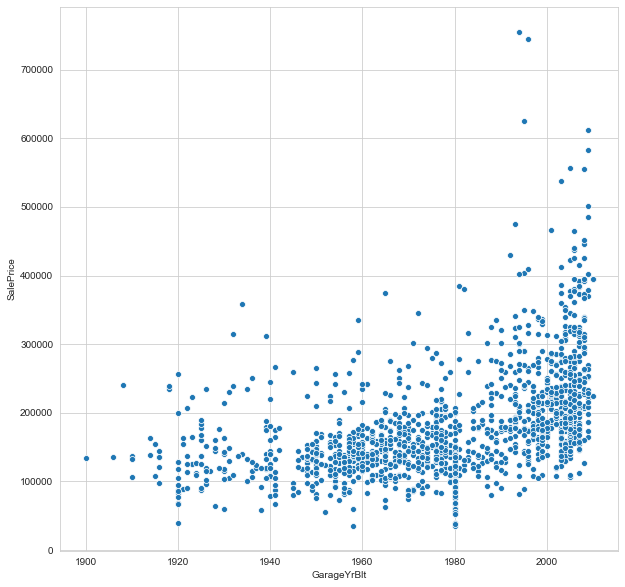

In [29]:
num_plot(train)

Пока не будем считать выпадающие значения выбросами

In [30]:
def cat_plot(data):
    for col in categorical:
        if col != 'SalePrice':
            print(col)
            print(data[col].dtype)
    
            ax = sns.catplot(x=col, y='SalePrice', data=data, size=10)
            plt.show();

ExterQual
object


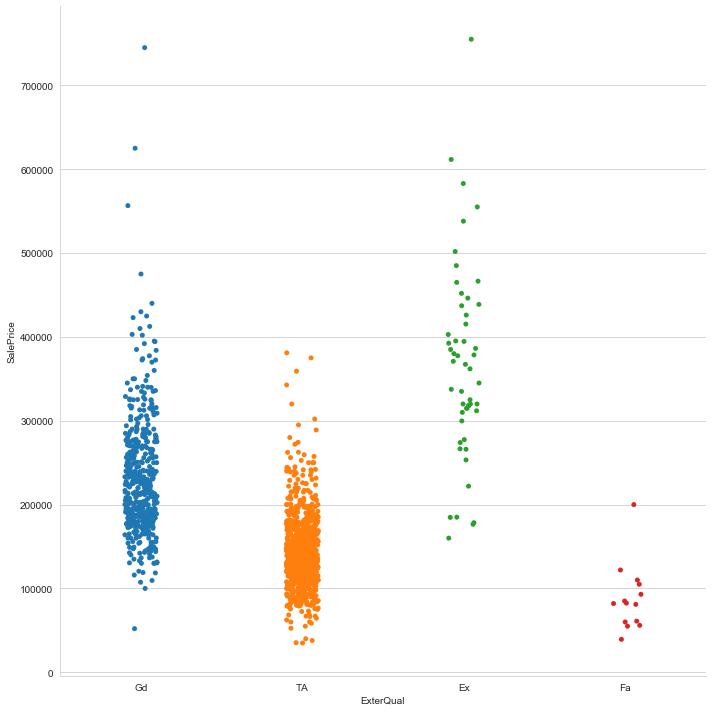

Neighborhood
object


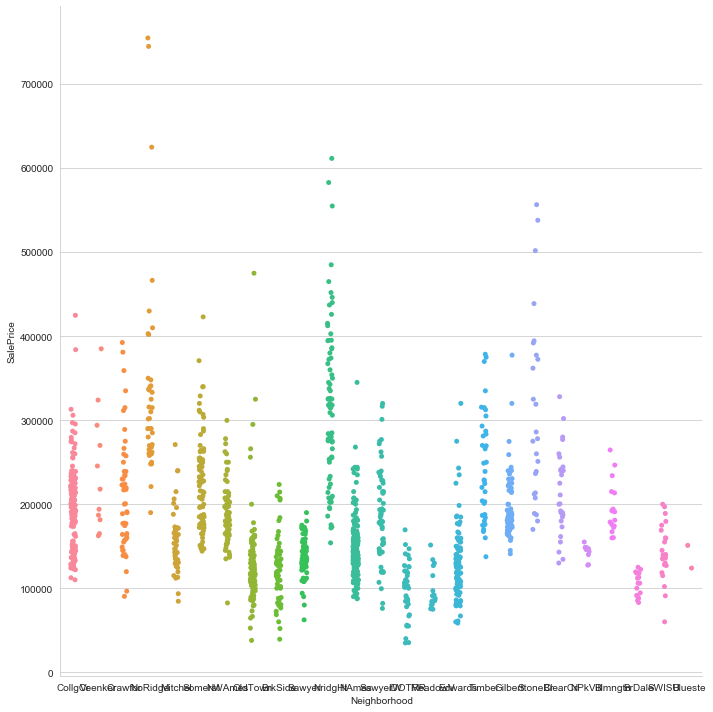

BsmtQual
object


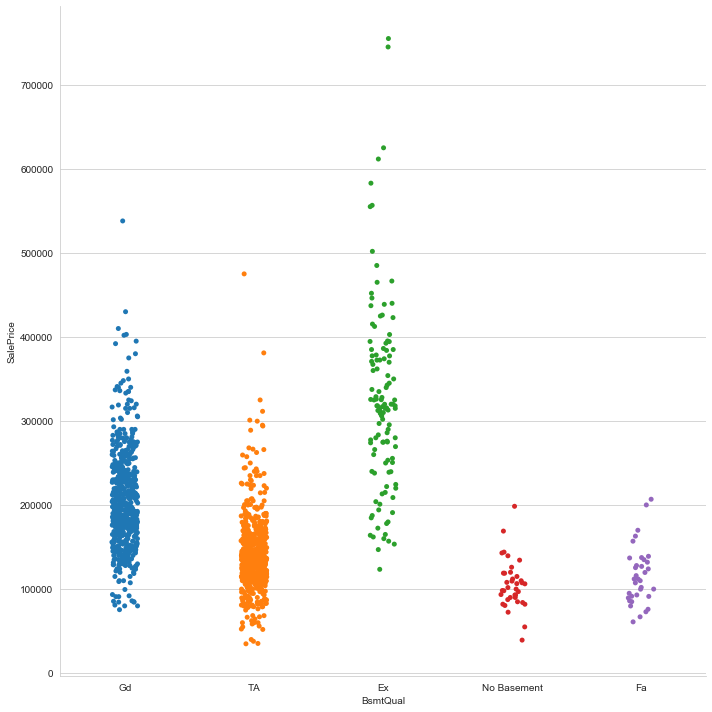

BsmtHalfBath
int64


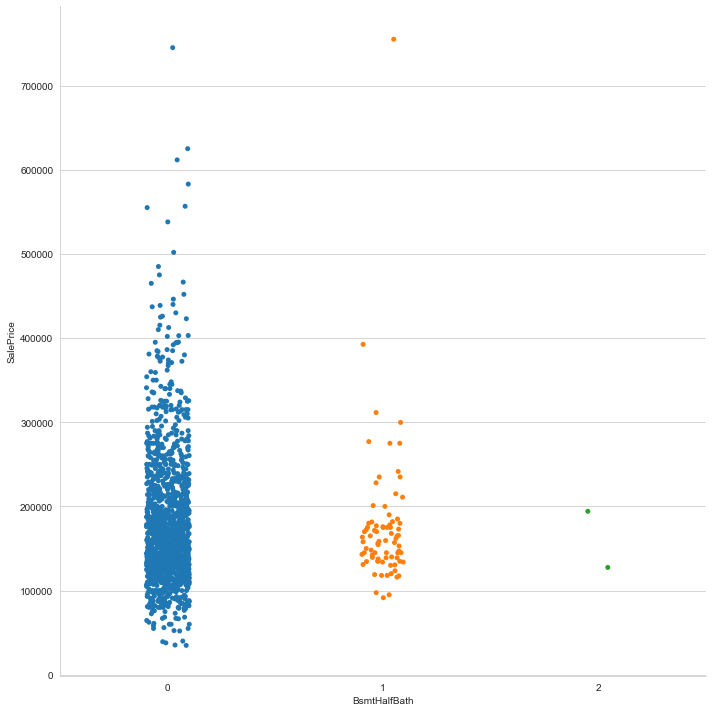

TotRmsAbvGrd
int64


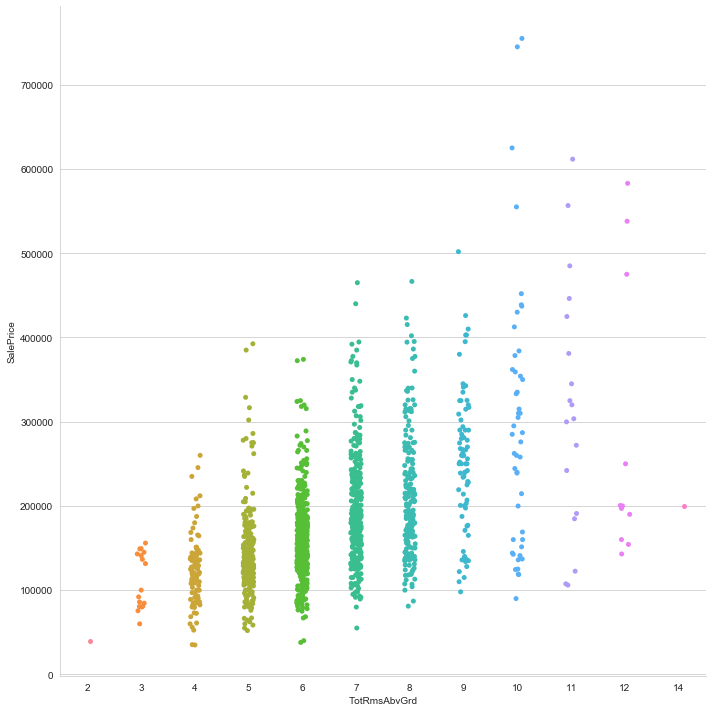

OverallQual
int64


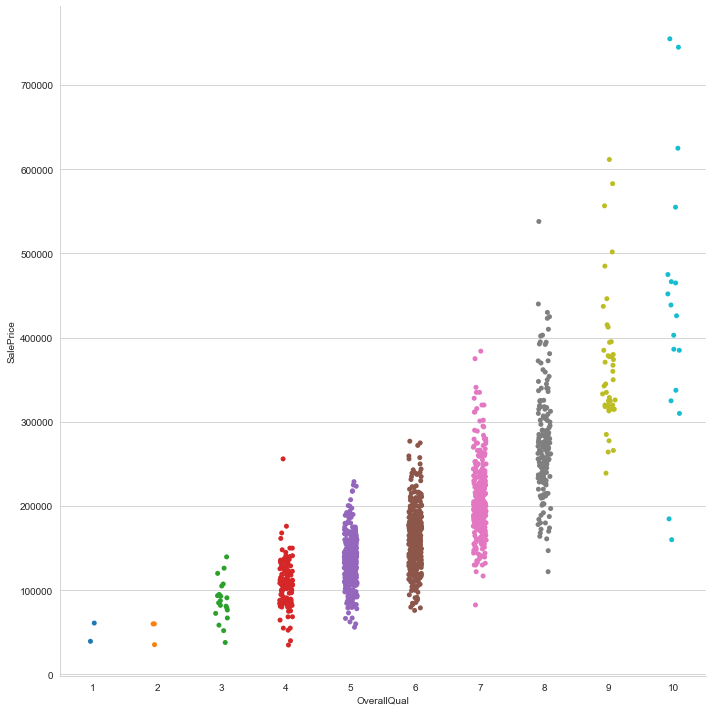

HouseStyle
object


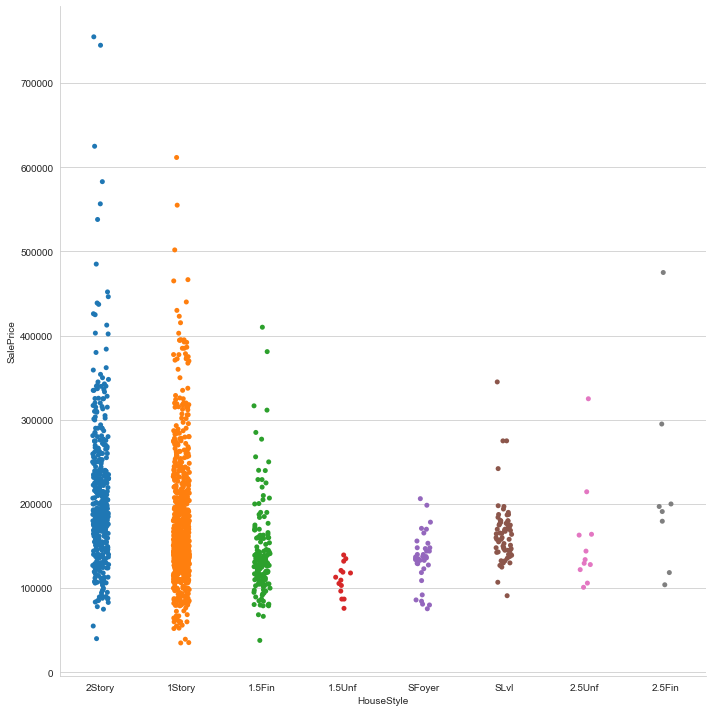

PoolQC
object


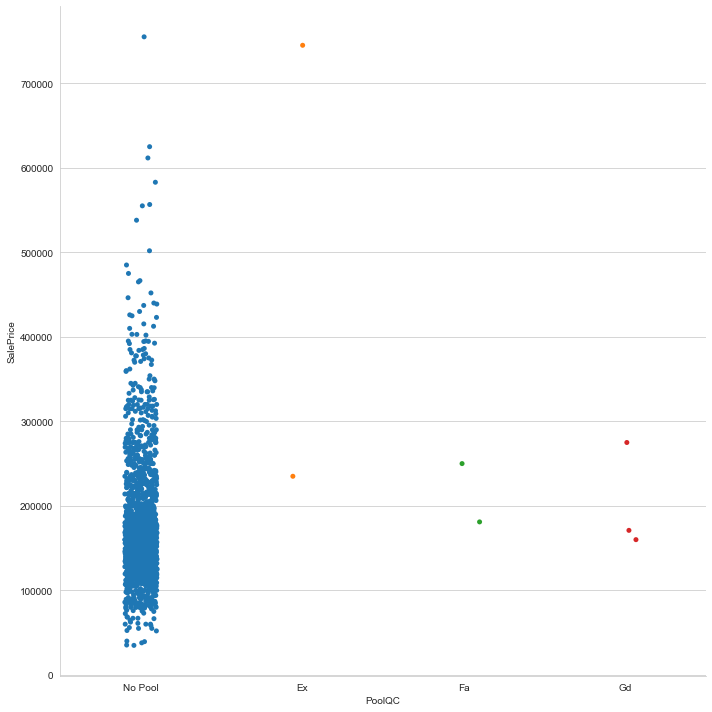

FireplaceQu
object


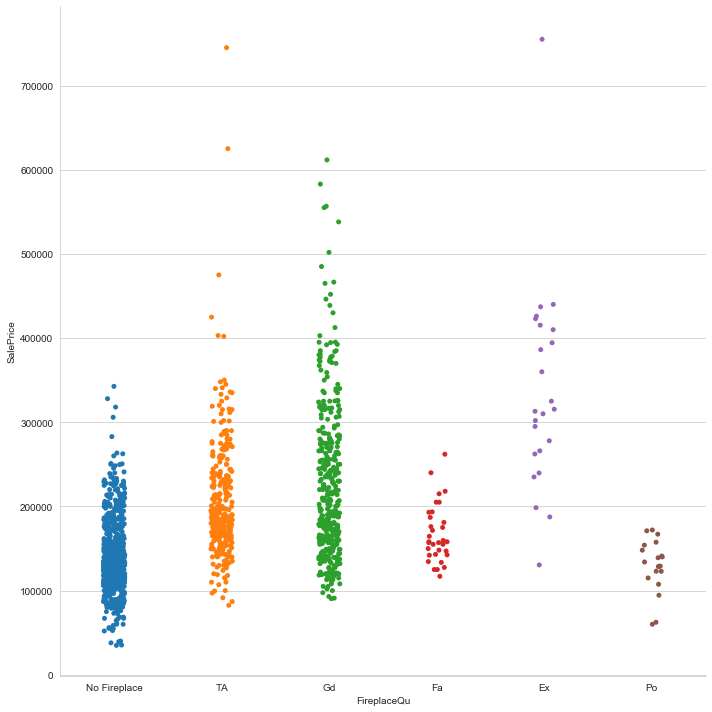

BldgType
object


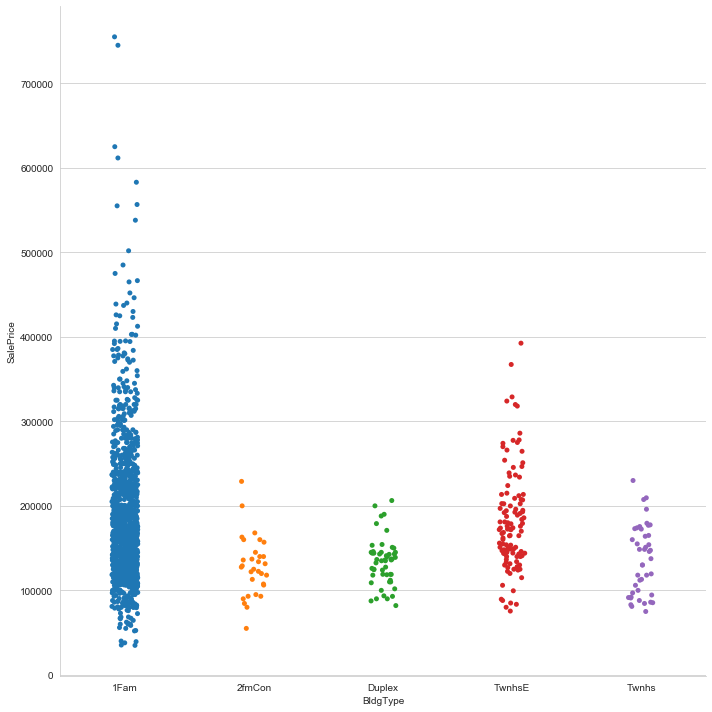

OverallCond
object


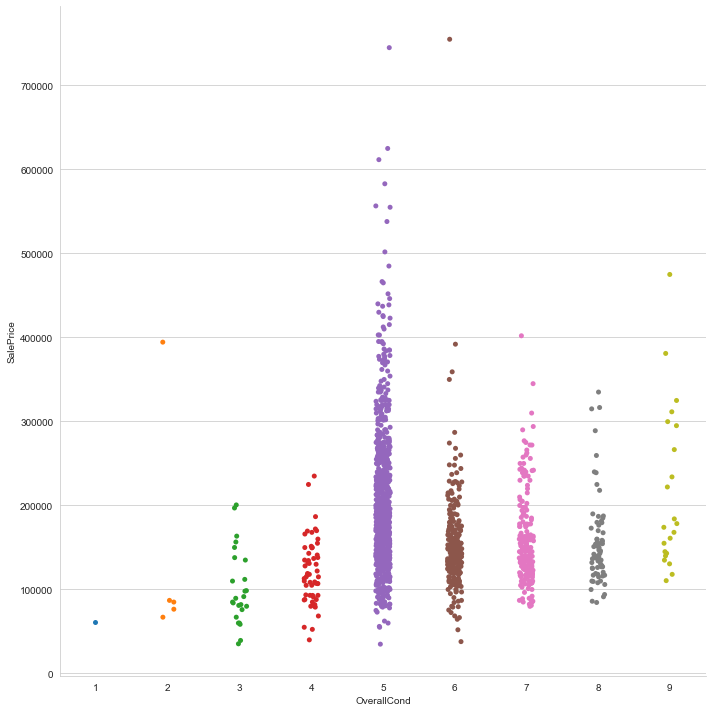

KitchenAbvGr
int64


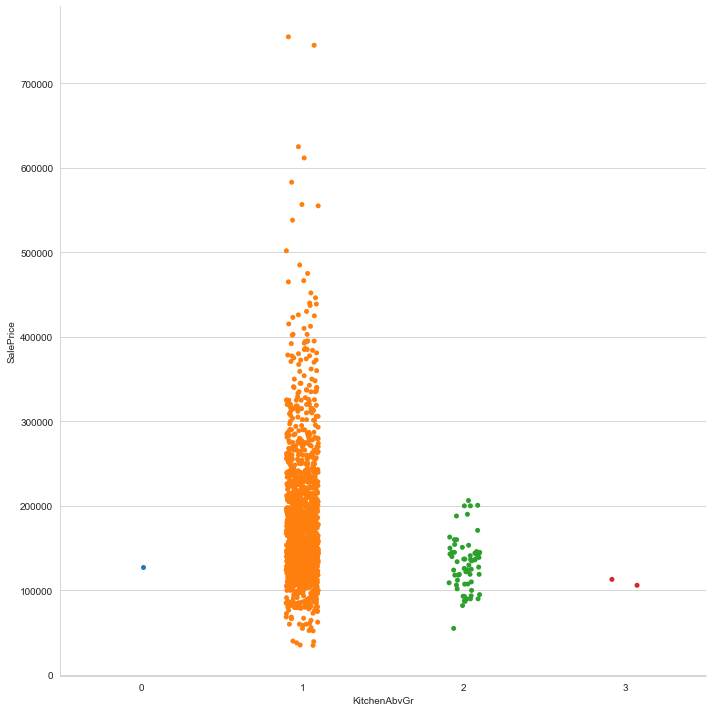

CentralAir
object


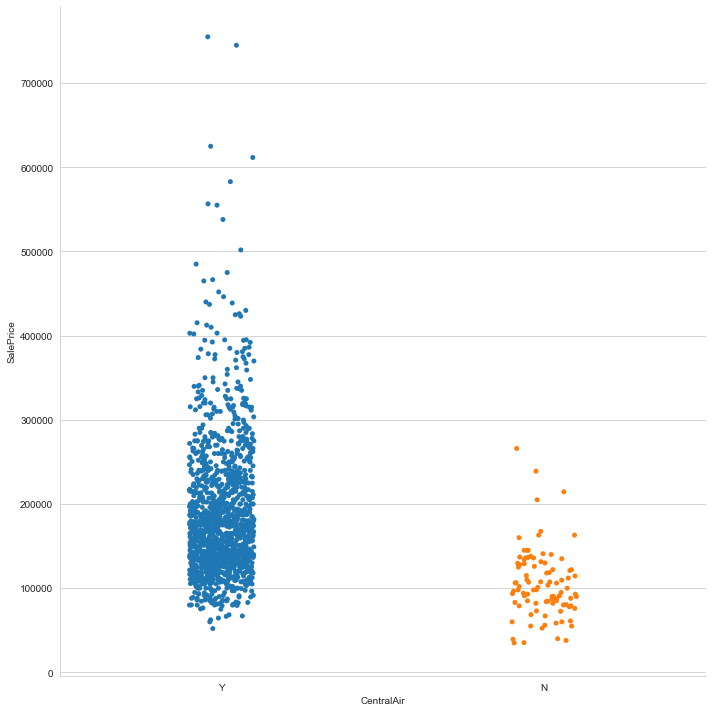

GarageType
object


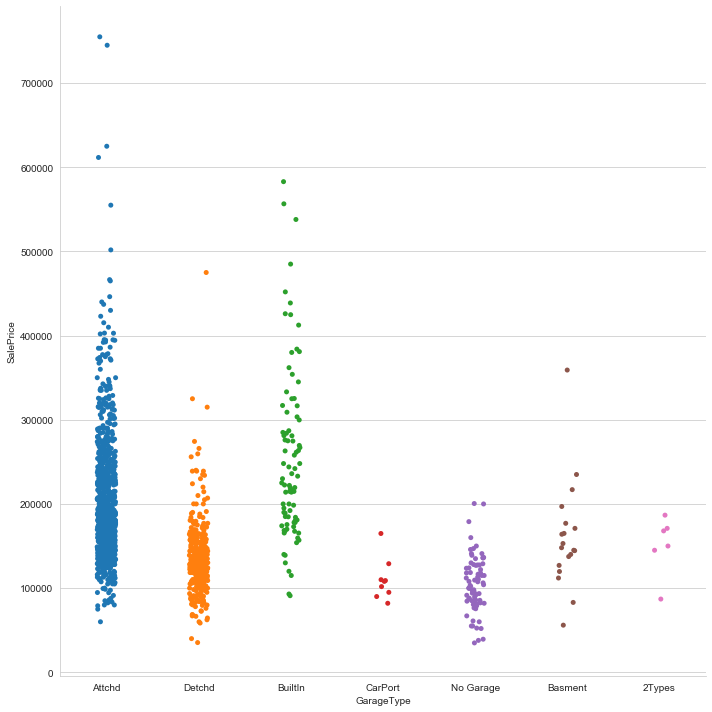

HeatingQC
object


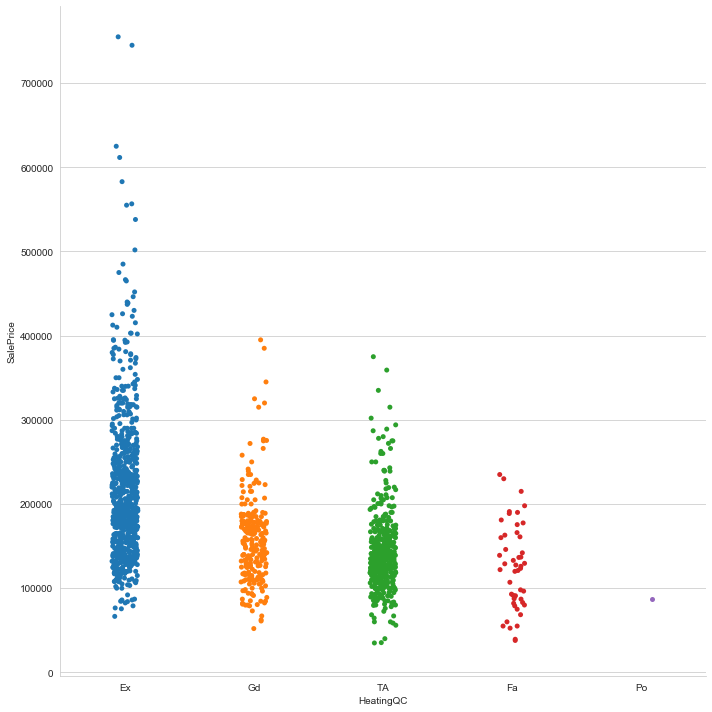

LandSlope
object


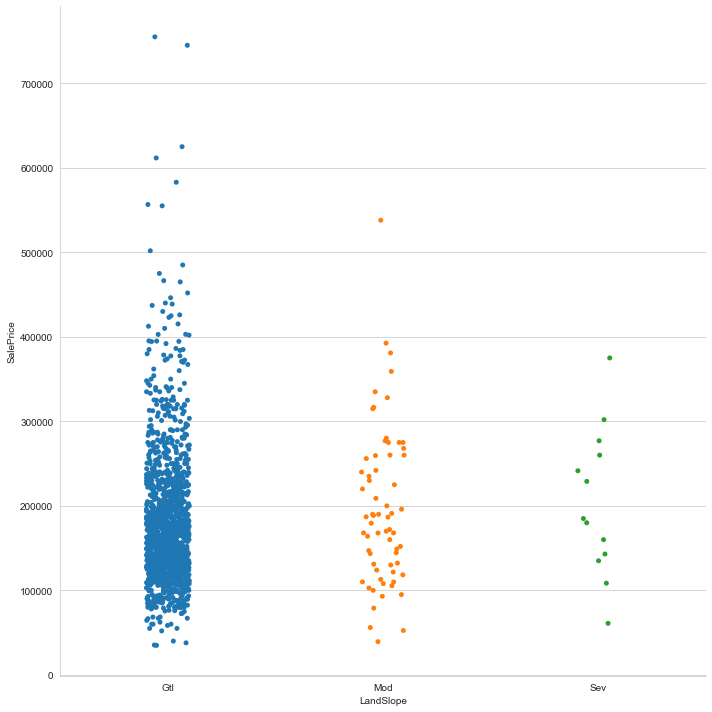

Fireplaces
int64


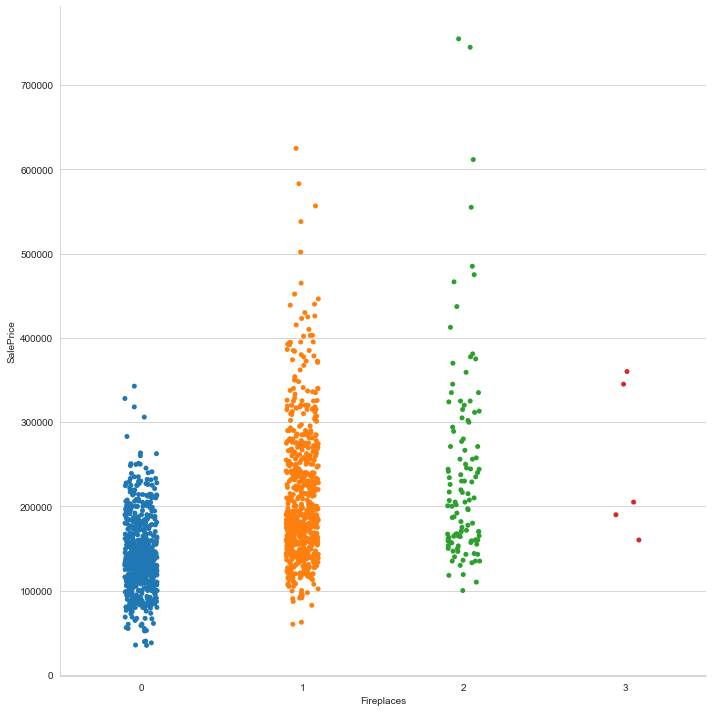

LotShape
object


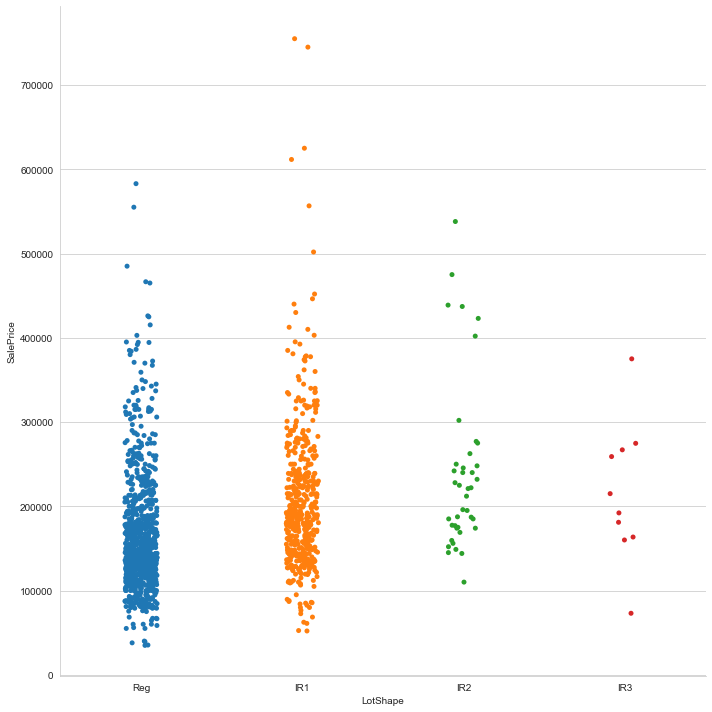

RoofMatl
object


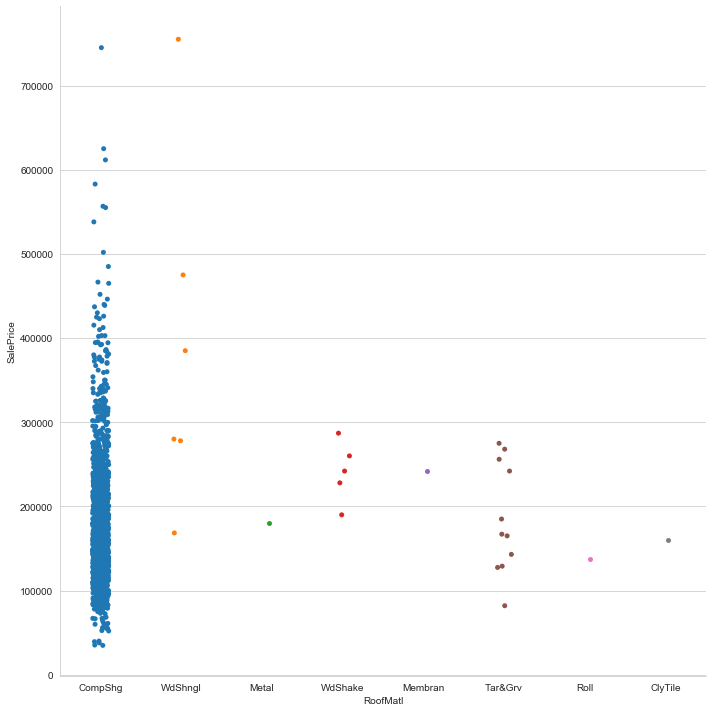

GarageCond
object


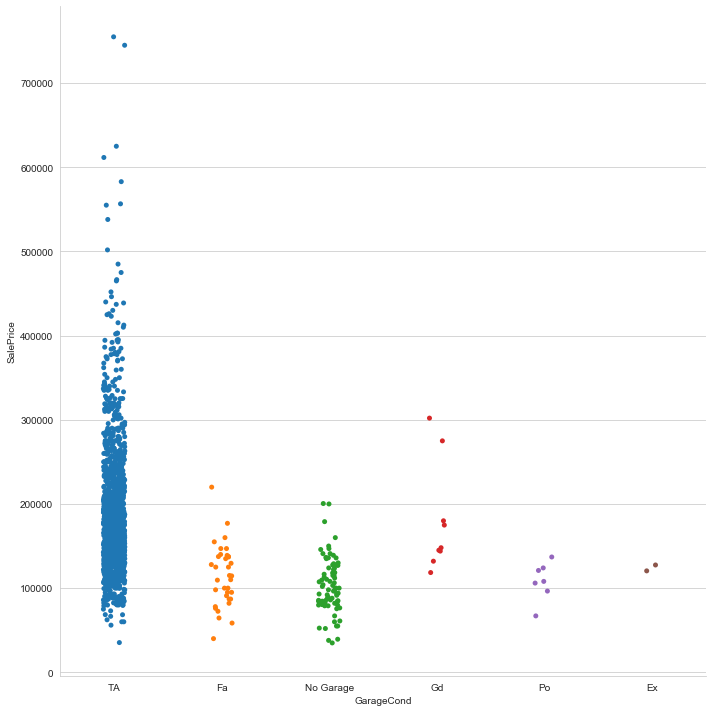

GarageFinish
object


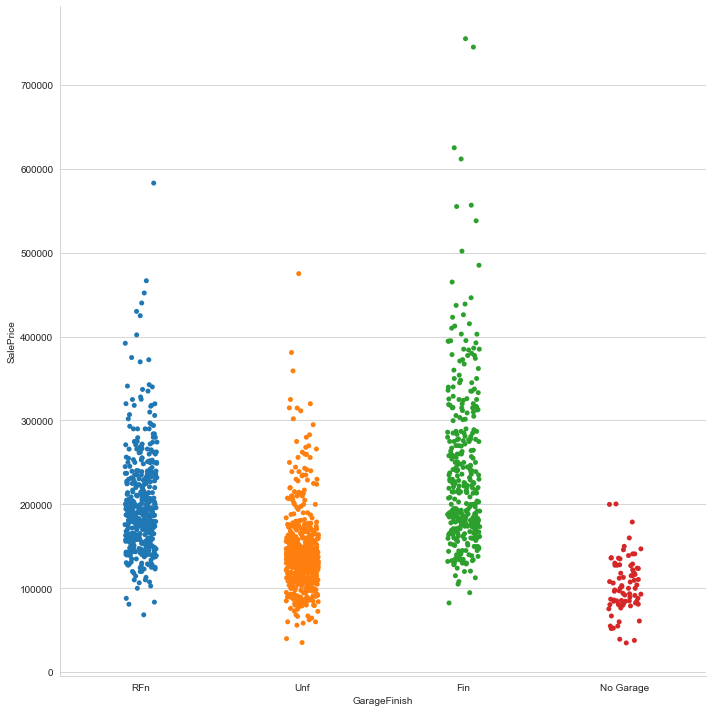

BsmtExposure
object


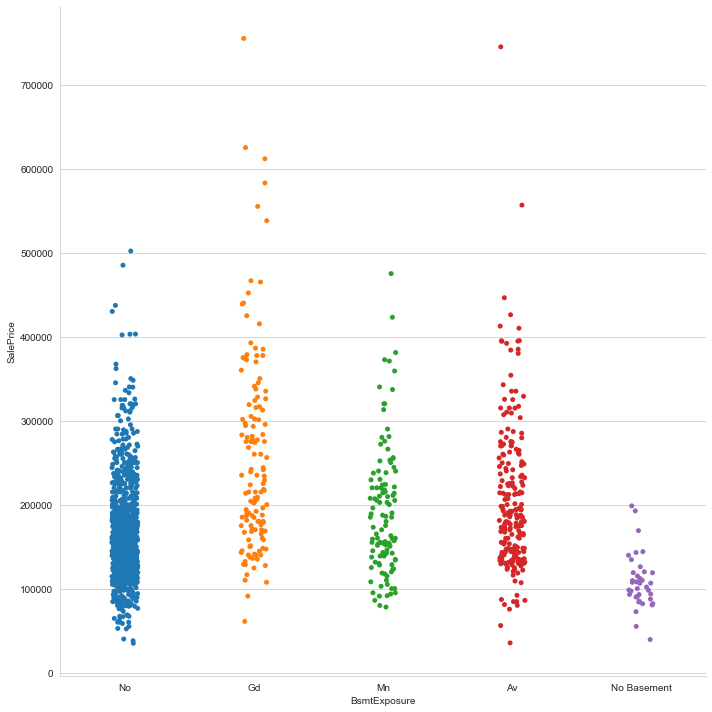

GarageQual
object


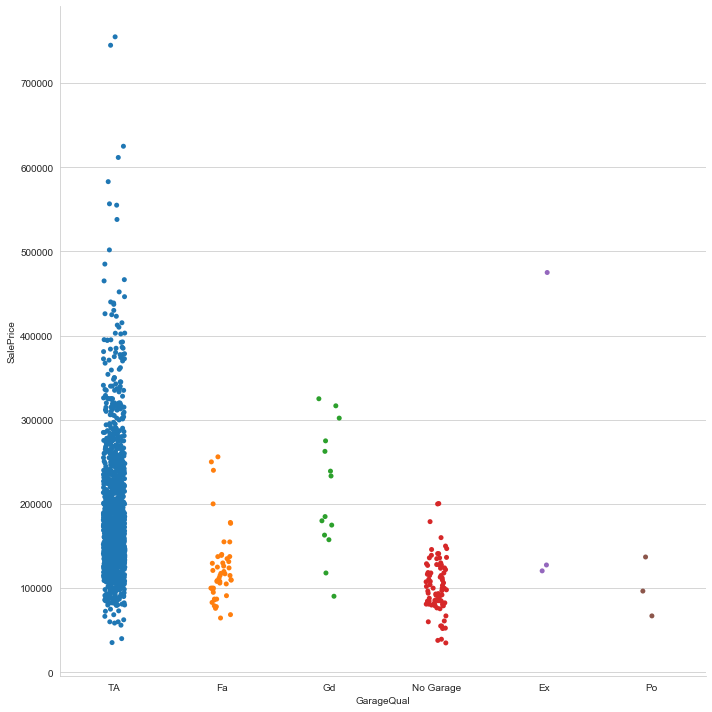

HalfBath
int64


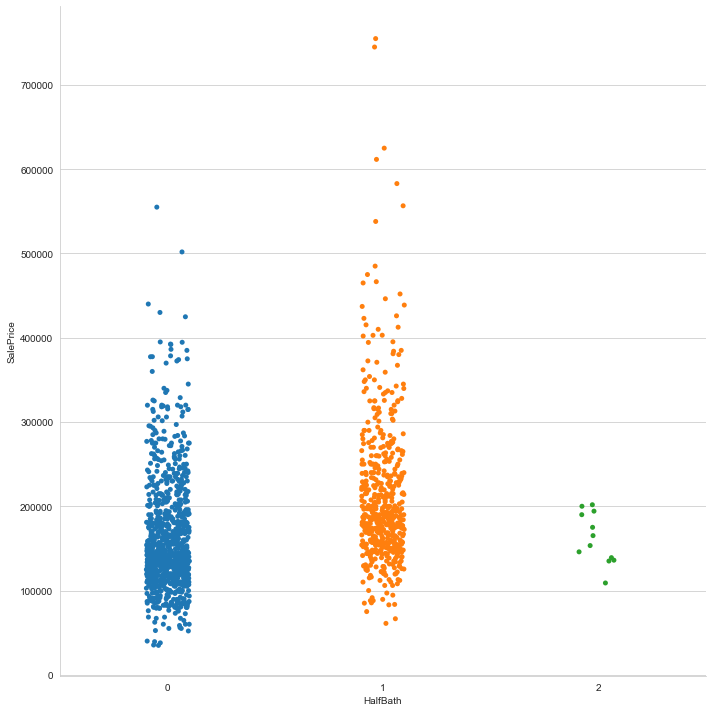

RoofStyle
object


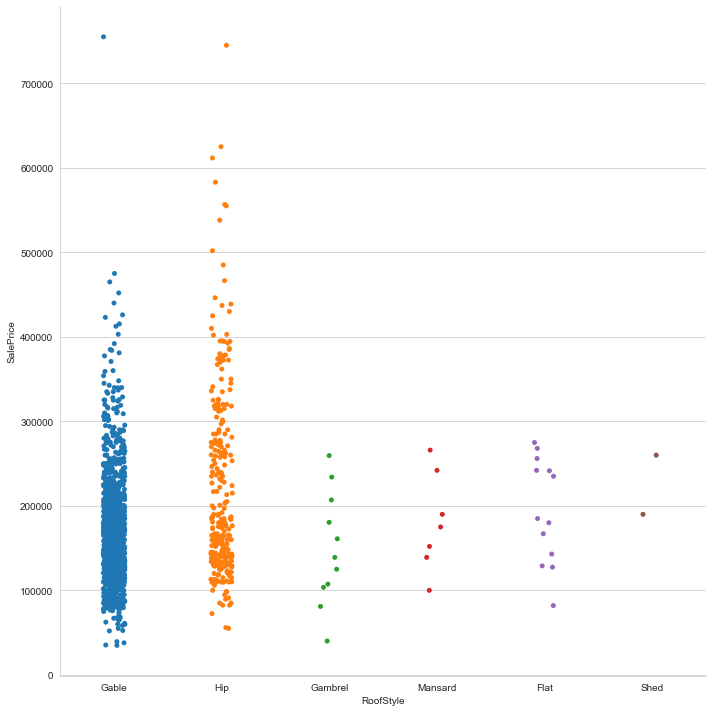

SaleCondition
object


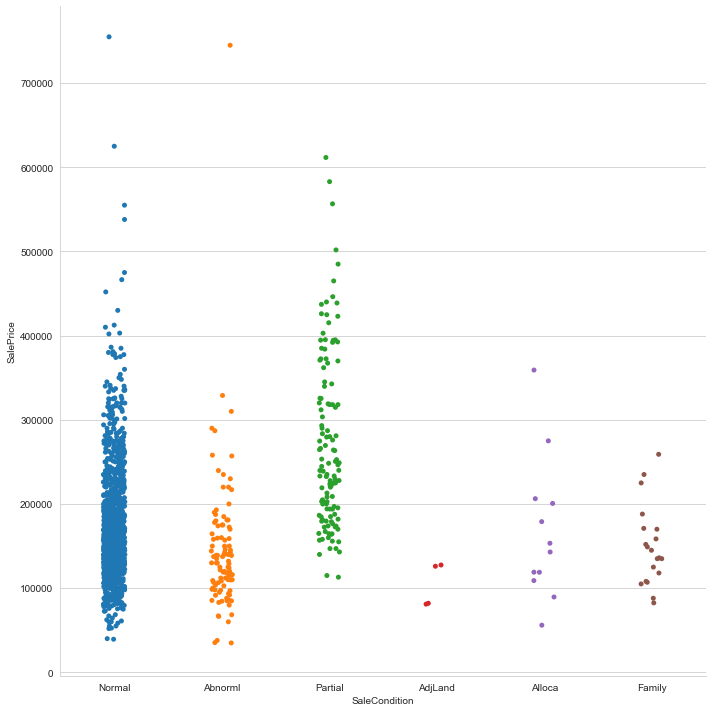

LotConfig
object


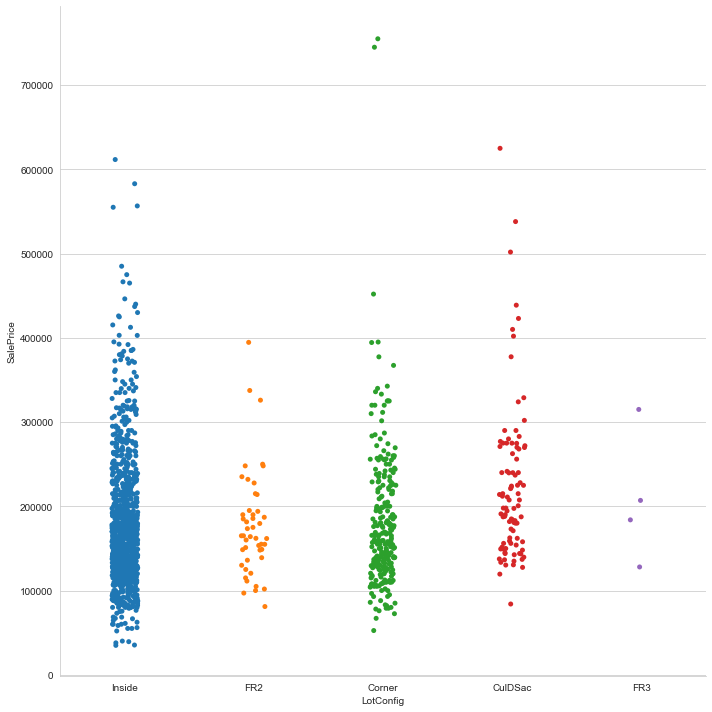

Condition1
object


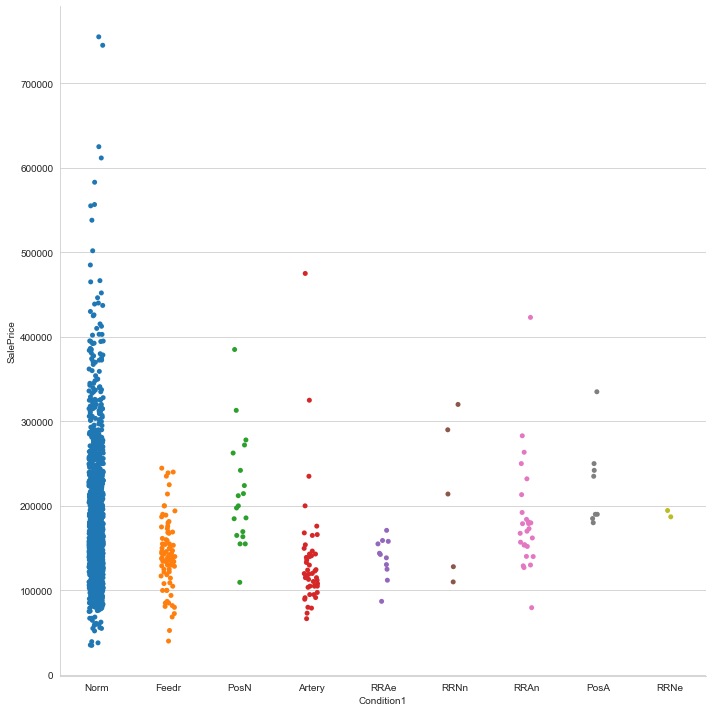

BsmtFinType2
object


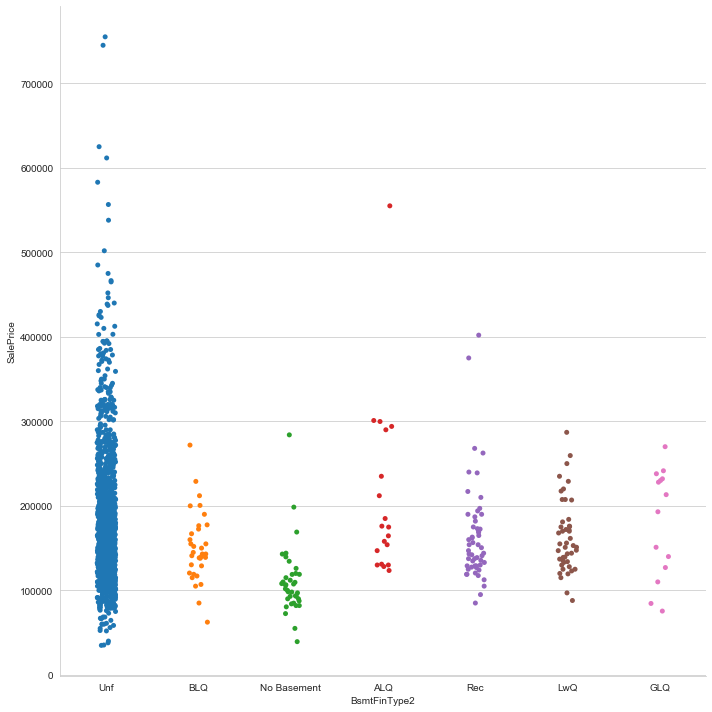

BsmtFinType1
object


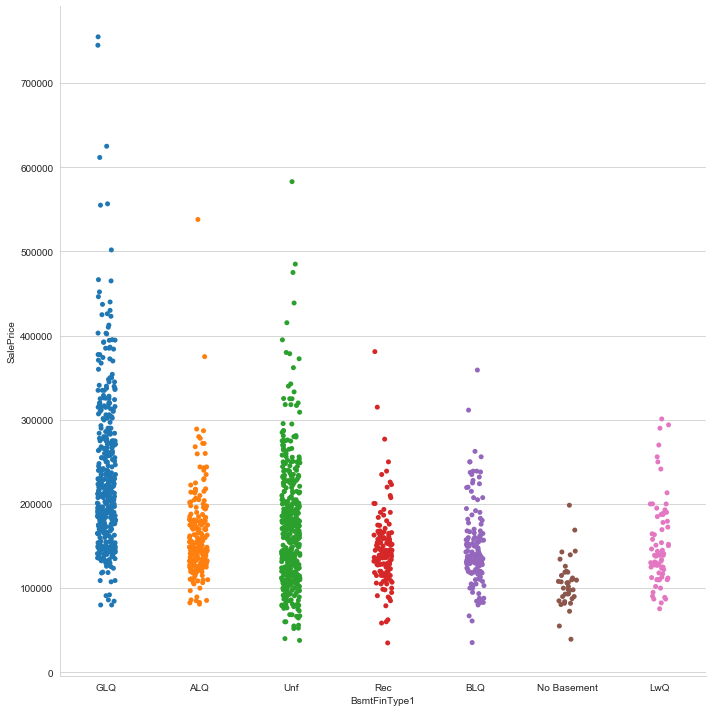

Heating
object


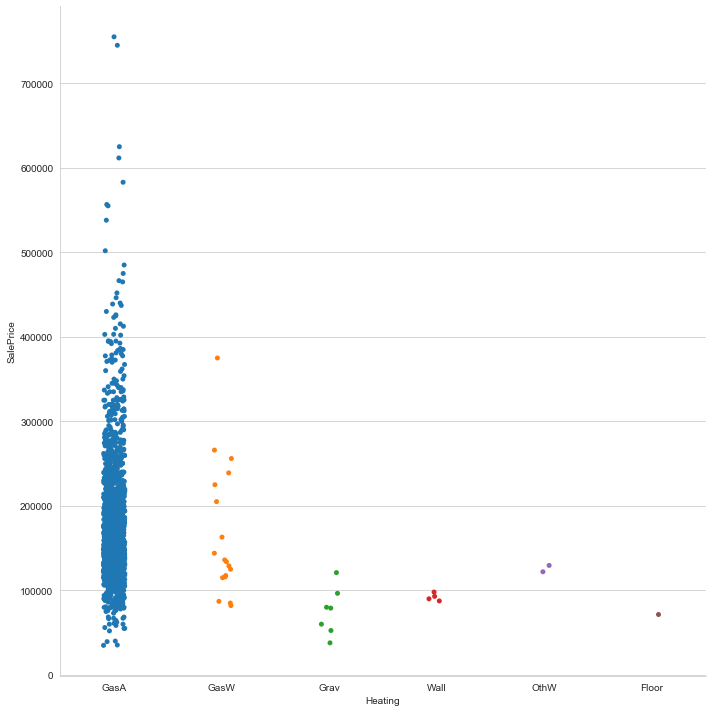

FullBath
int64


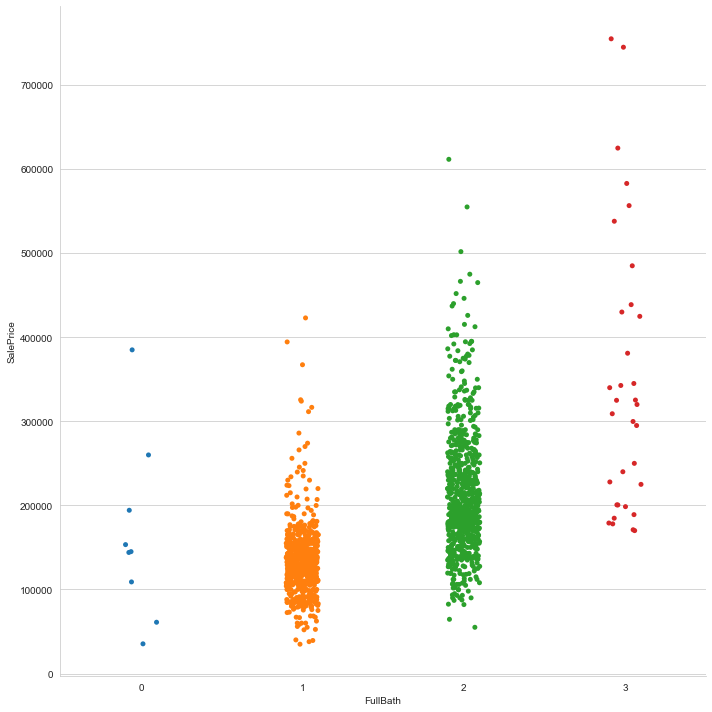

Exterior2nd
object


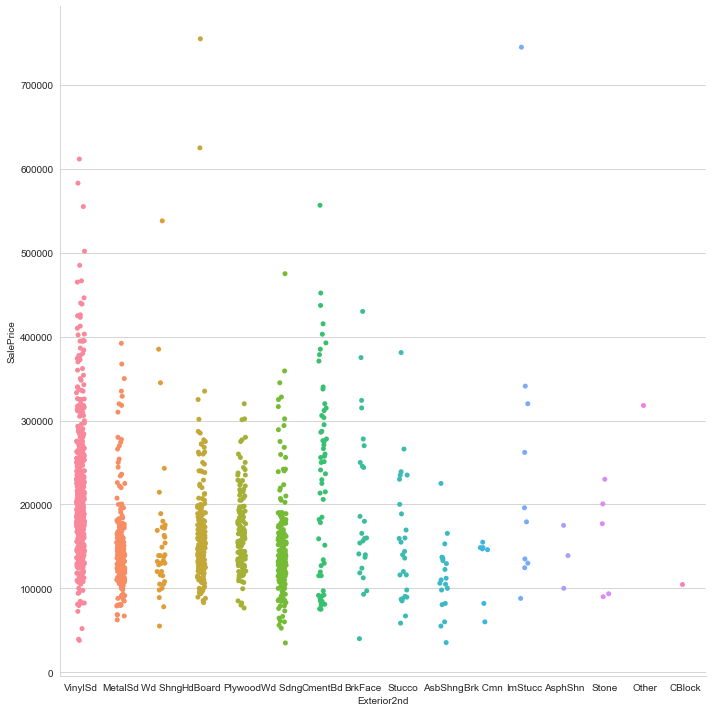

BsmtCond
object


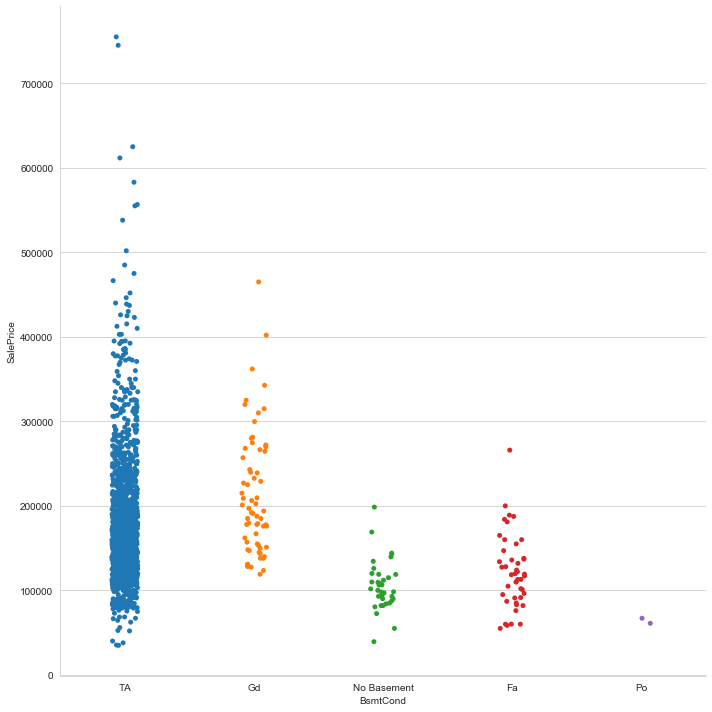

Functional
object


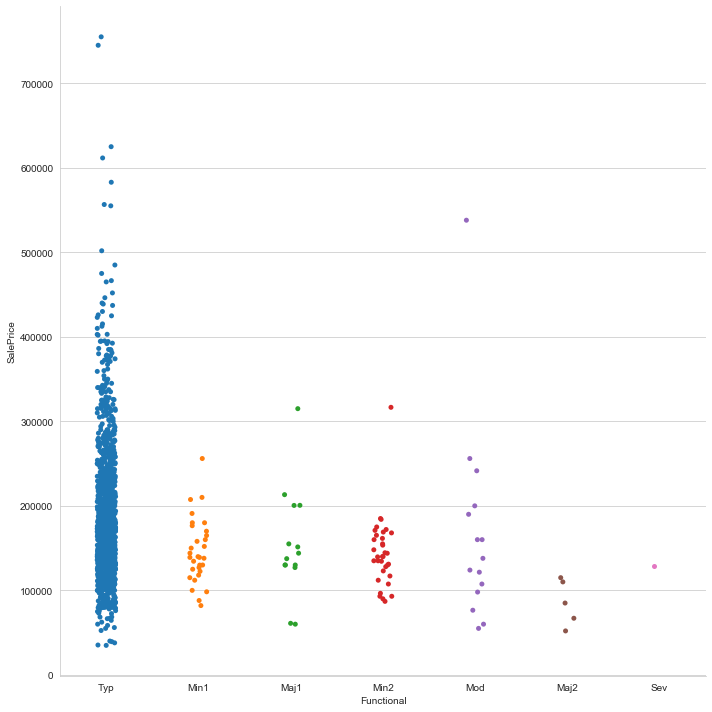

GarageCars
int64


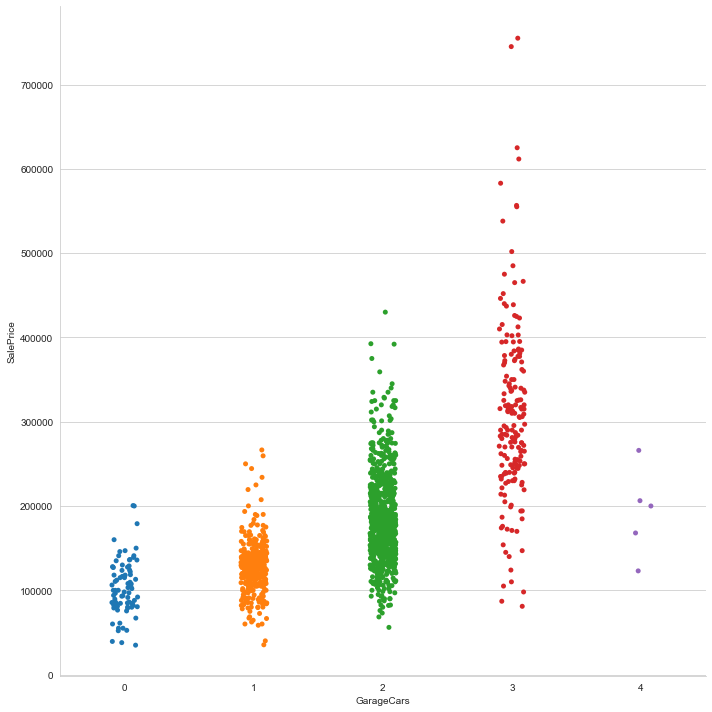

Condition2
object


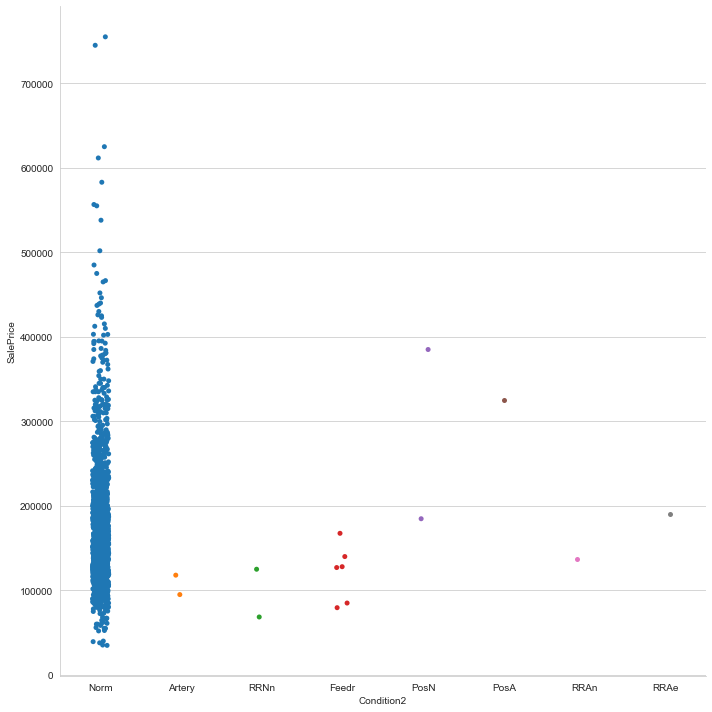

MoSold
object


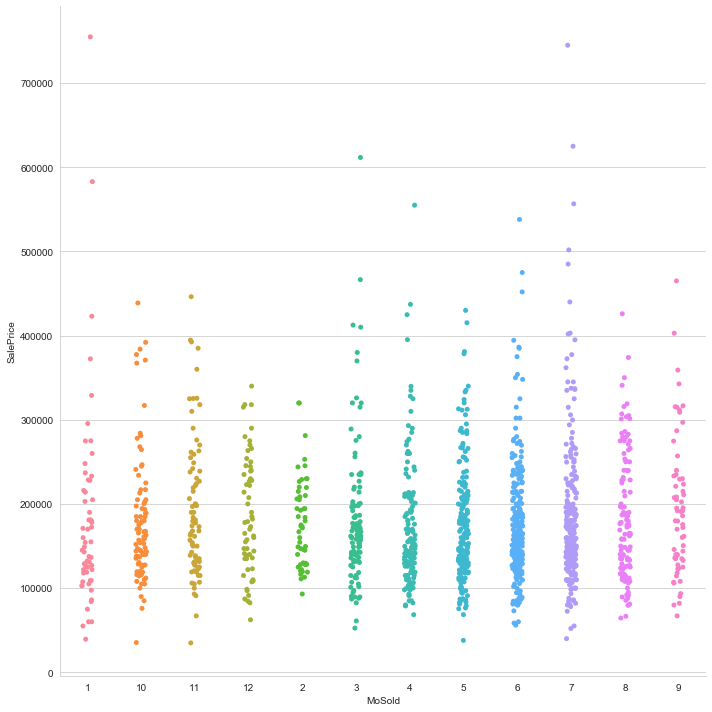

SaleType
object


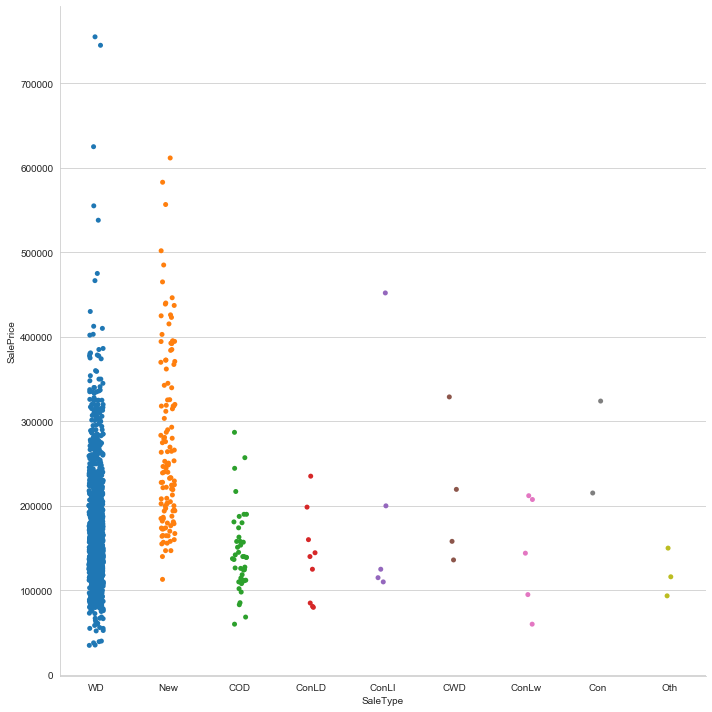

BsmtFullBath
int64


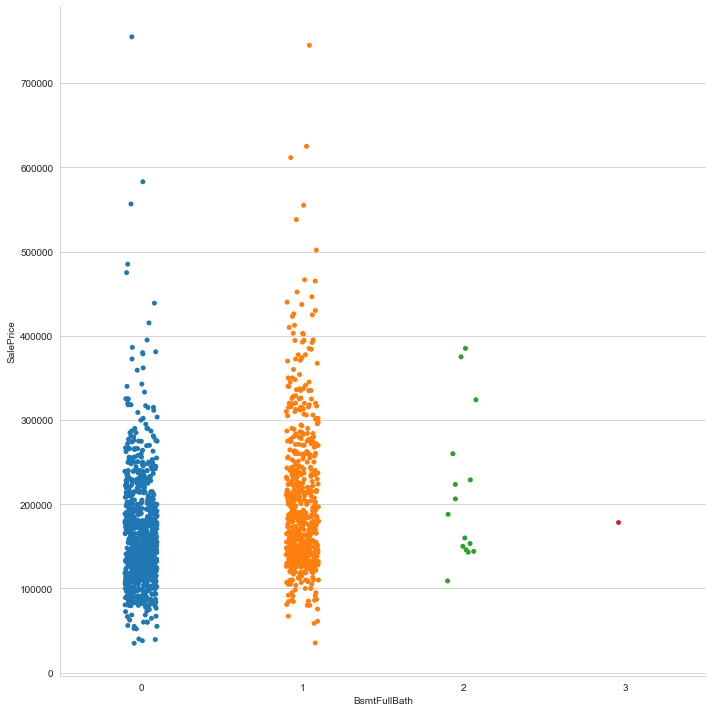

MSSubClass
object


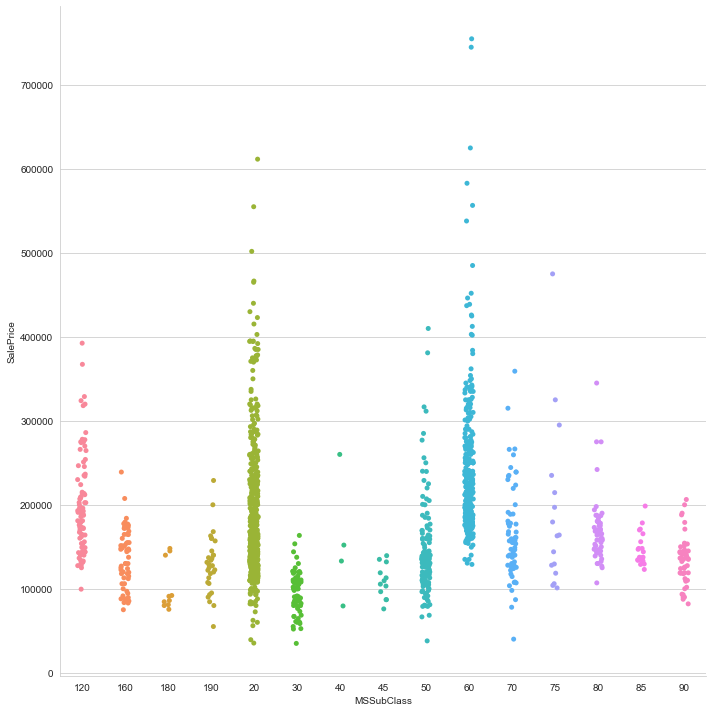

ExterCond
object


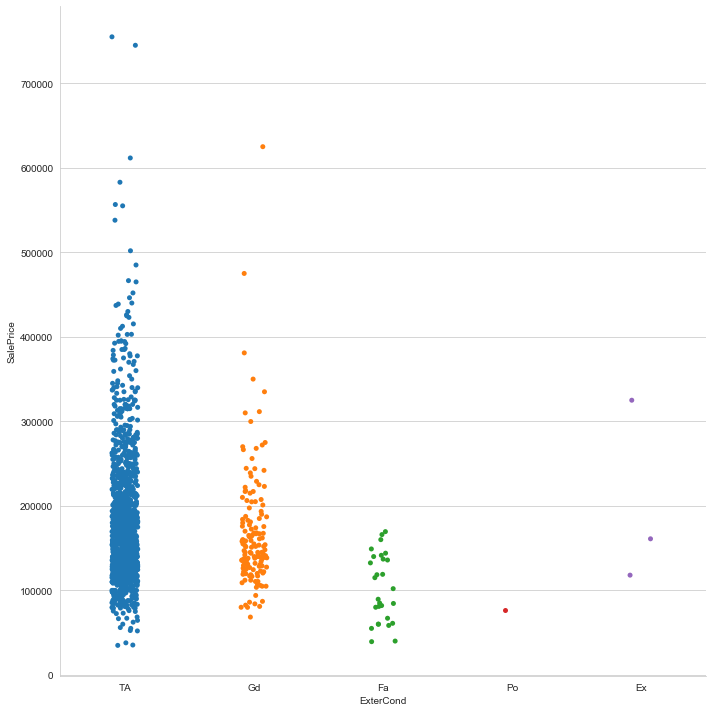

Alley
object


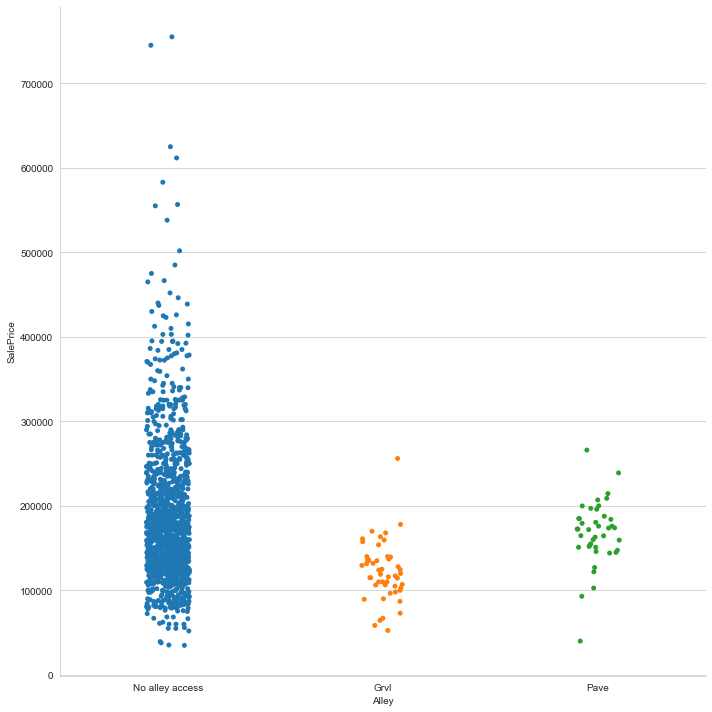

Electrical
object


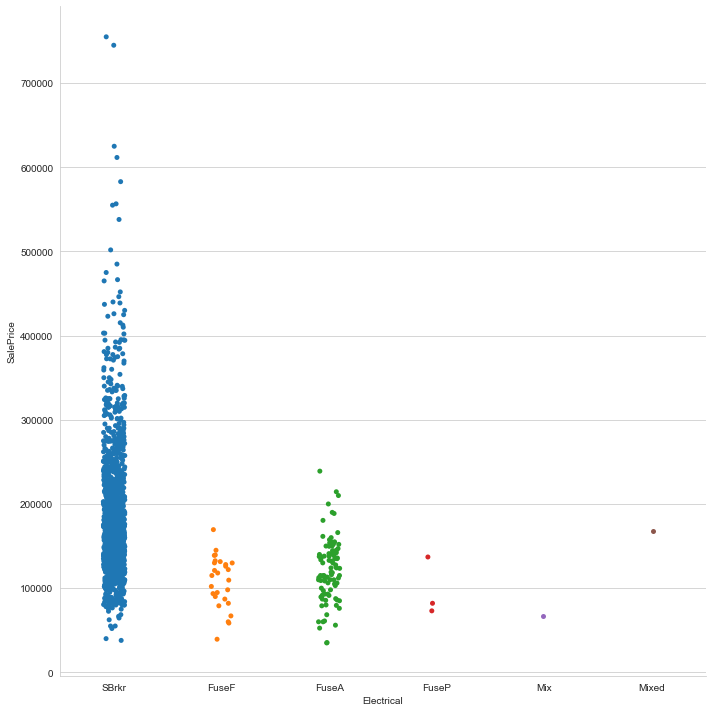

YrSold
object


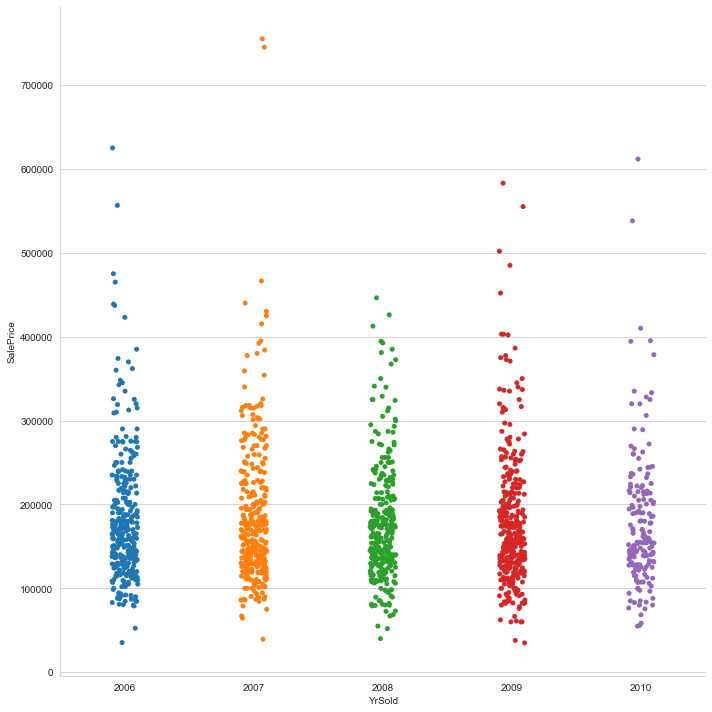

MSZoning
object


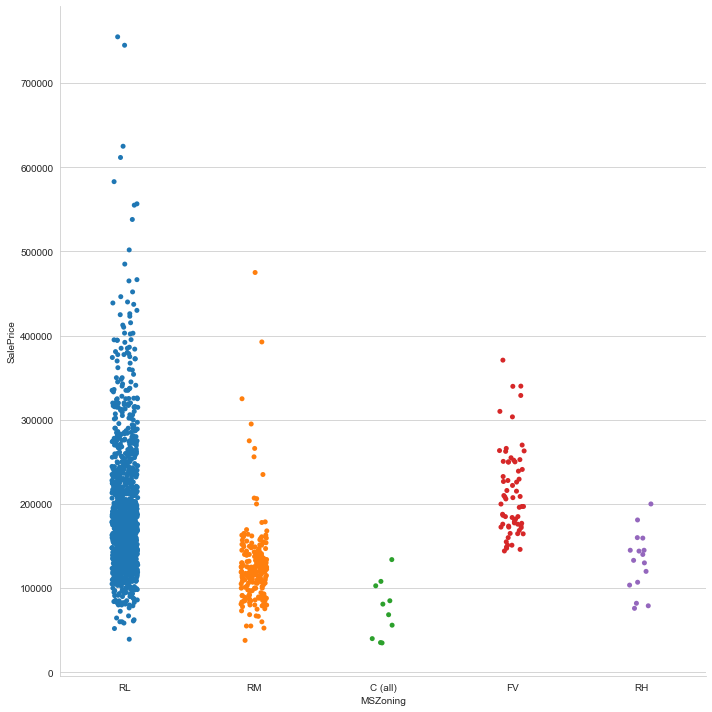

Exterior1st
object


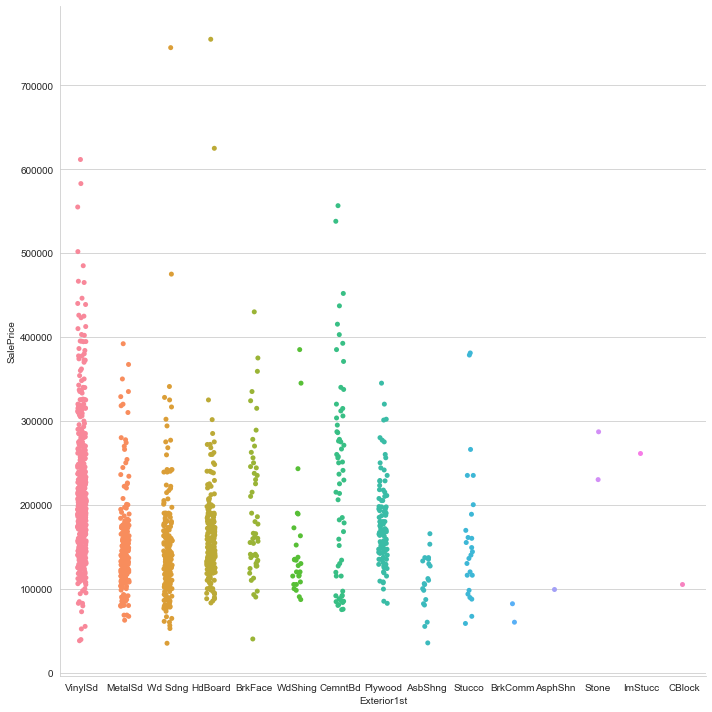

Foundation
object


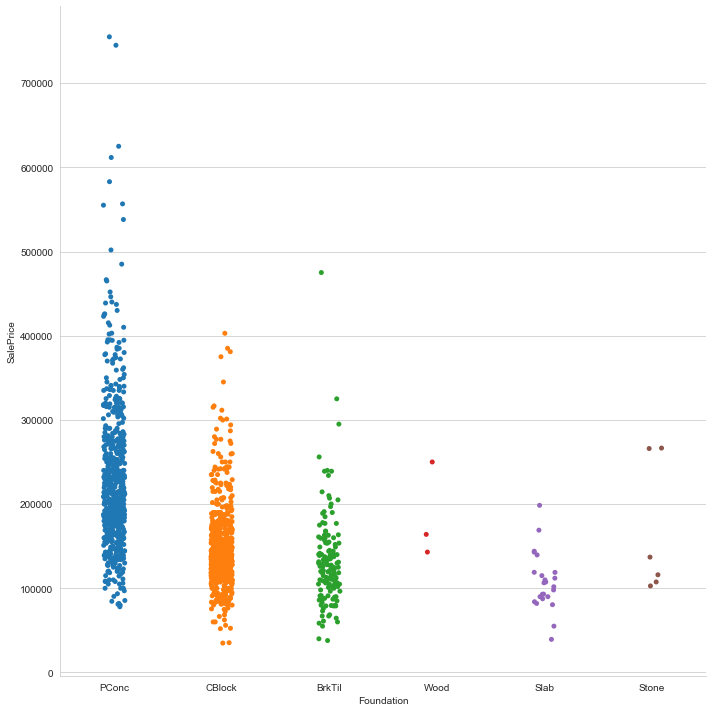

MiscFeature
object


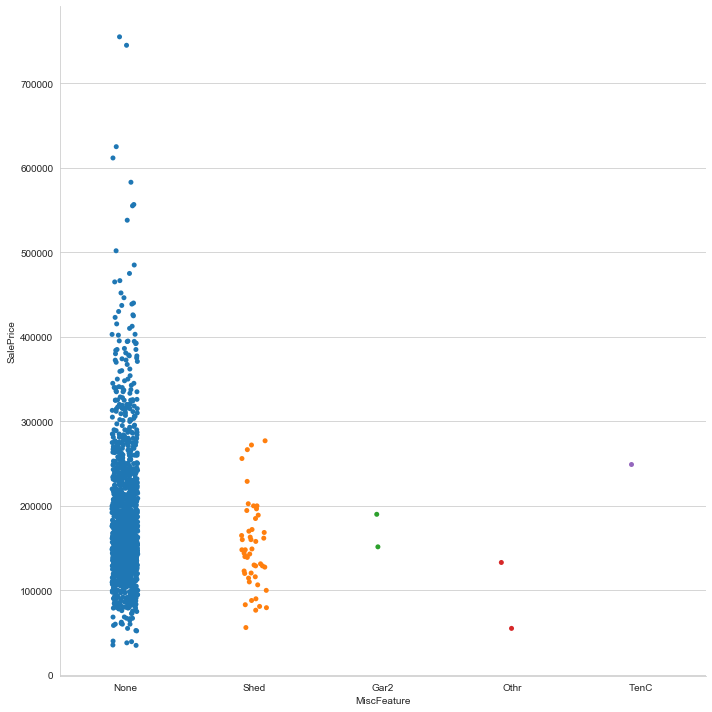

LandContour
object


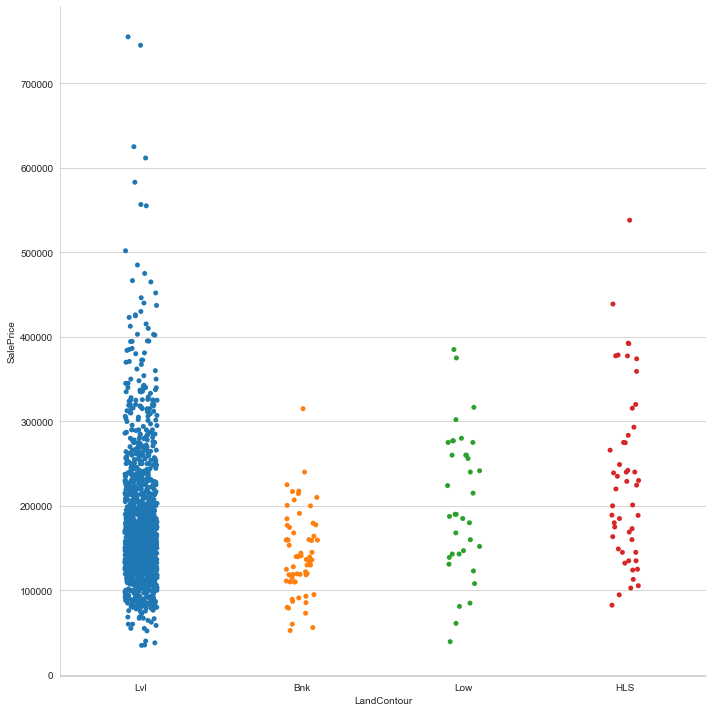

KitchenQual
object


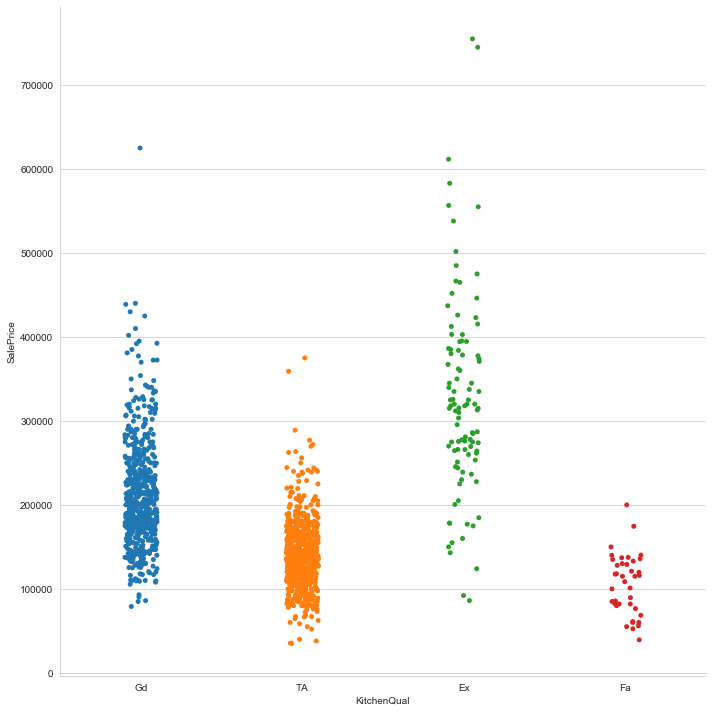

PavedDrive
object


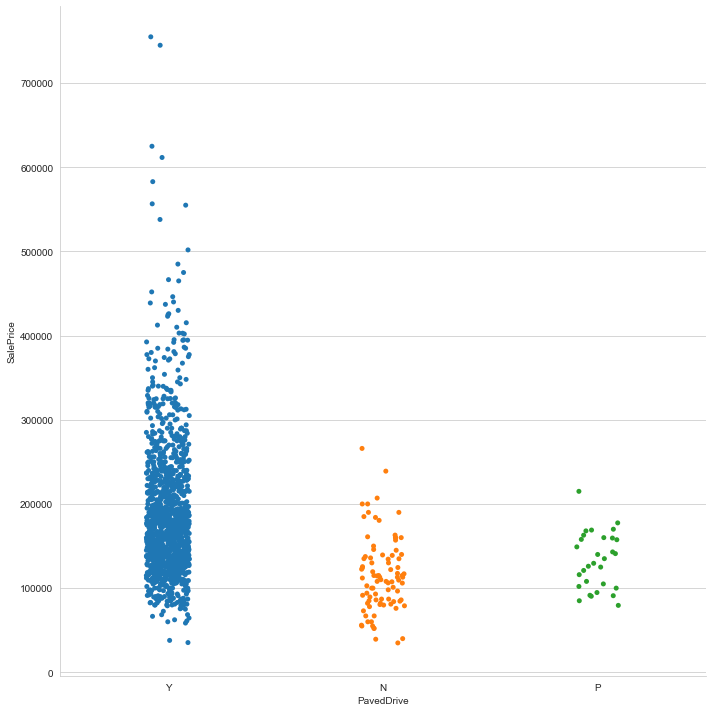

Fence
object


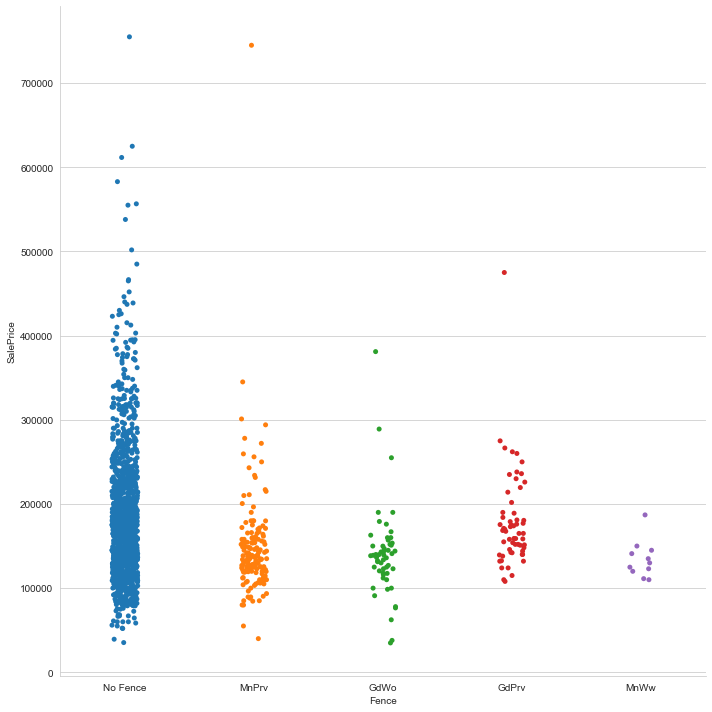

BedroomAbvGr
int64


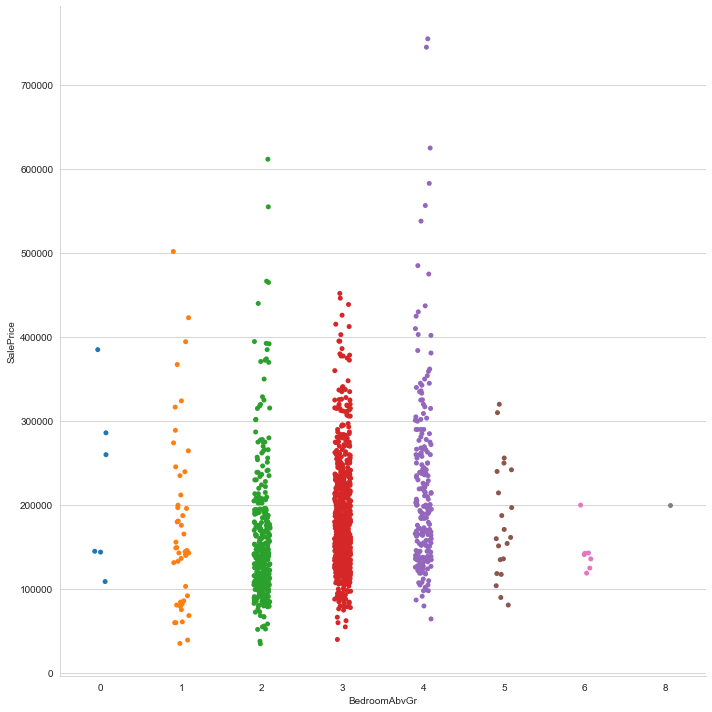

MasVnrType
object


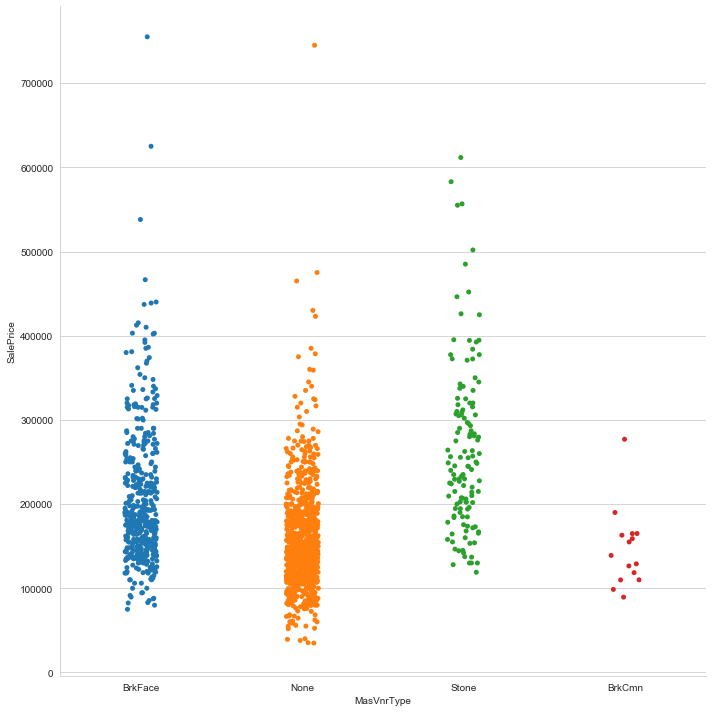

In [31]:
cat_plot(train)

Drop noisy features

In [32]:
train.drop(['PoolQC', 'Condition2'], axis=1, inplace=True)
test.drop(['PoolQC', 'Condition2'], axis=1, inplace=True)
train_test.drop(['PoolQC', 'Condition2'], axis=1, inplace=True)

In [33]:
categorical.remove('PoolQC')
categorical.remove('Condition2')
categorical.remove('SalePrice')

## 3. Check feature importance on RandomForestRegressor and final preparation

In [34]:
LE = LabelEncoder()

In [35]:
for col in categorical:
    train[col] = LE.fit_transform(train[col])

In [36]:
train.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Alley  LotShape  LandContour  \
0           9         3         65.0     8450      1         3            3   
1           4         3         80.0     9600      1         3            3   
2           9         3         68.0    11250      1         0            3   
3          10         3         60.0     9550      1         0            3   
4           9         3         84.0    14260      1         0            3   

   LotConfig  LandSlope  Neighborhood  Condition1  BldgType  HouseStyle  \
0          4          0             5           2         0           5   
1          2          0            24           1         0           2   
2          4          0             5           2         0           5   
3          0          0             6           2         0           5   
4          2          0            15           2         0           5   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  \
0            6            4       2003          2003          1         1   
1            5            7       1976          1976          1         1   
2            6            4       2001          2002          1         1   
3            6            4       1915          1970          1         1   
4            7            4       2000          2000          1         1   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0           12           13           1       196.0          2          4   
1            8            8           2         0.0          3          4   
2           12           13           1       162.0          2          4   
3           13           15           2         0.0          3          4   
4           12           13           1       350.0          2          4   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0           2         2         4             3             2         706   
1           1         2         4             1             0         978   
2           2         2         4             2             2         486   
3           0         4         1             3             0         216   
4           2         2         4             0             2         655   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  \
0             6           0        150          856        1          0   
1             6           0        284         1262        1          0   
2             6           0        434          920        1          0   
3             6           0        540          756        1          2   
4             6           0        490         1145        1          0   

   CentralAir  Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0           1           5       856       854       1710             1   
1           1           5      1262         0       1262             0   
2           1           5       920       866       1786             1   
3           1           5       961       756       1717             1   
4           1           5      1145      1053       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0             0         2         1             3             1            2   
1             1         2         0             3             1            3   
2             0         2         1             3             1            2   
3             0         1         0             3             1            2   
4             0         2         1             4             1            2   

   TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  \
0             6           6           0            3           1       2003.0   
1             4           6           1            5           1       1976.0   
2             4           6           1            5           1    

In [37]:
rf_clf = RandomForestRegressor(random_state=42, n_estimators=500, max_depth=8, criterion='mse')

In [38]:
%time rf_clf.fit(train.drop(['SalePrice'], axis=1), train['SalePrice'])

Wall time: 4.85 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [39]:
%time cross_val_score(rf_clf, train.drop(['SalePrice'], axis=1), train['SalePrice'], cv=5)

Wall time: 20.2 s


array([0.87001736, 0.83877005, 0.87224799, 0.87795247, 0.81867216])

Feature ranking:
1. OverallQual -- feature 13 (0.595407)
2. GrLivArea -- feature 41 (0.110632)
3. TotalBsmtSF -- feature 34 (0.039406)
4. 2ndFlrSF -- feature 40 (0.036626)
5. BsmtFinSF1 -- feature 30 (0.027504)
6. GarageCars -- feature 56 (0.023596)
7. 1stFlrSF -- feature 39 (0.021843)
8. GarageArea -- feature 57 (0.013240)
9. LotArea -- feature 3 (0.012039)
10. YearBuilt -- feature 15 (0.008428)
11. FullBath -- feature 44 (0.007019)
12. YearRemodAdd -- feature 16 (0.006178)
13. Neighborhood -- feature 9 (0.006167)
14. TotRmsAbvGrd -- feature 49 (0.006117)
15. GarageType -- feature 53 (0.005338)
16. LotFrontage -- feature 2 (0.005215)
17. BsmtQual -- feature 26 (0.005046)
18. MasVnrArea -- feature 22 (0.004686)
19. OpenPorchSF -- feature 62 (0.004478)
20. WoodDeckSF -- feature 61 (0.004418)
21. BsmtUnfSF -- feature 33 (0.004219)
22. OverallCond -- feature 14 (0.003972)
23. GarageYrBlt -- feature 54 (0.003841)
24. ExterQual -- feature 23 (0.003583)
25. CentralAir -- feature 37 (0.002769

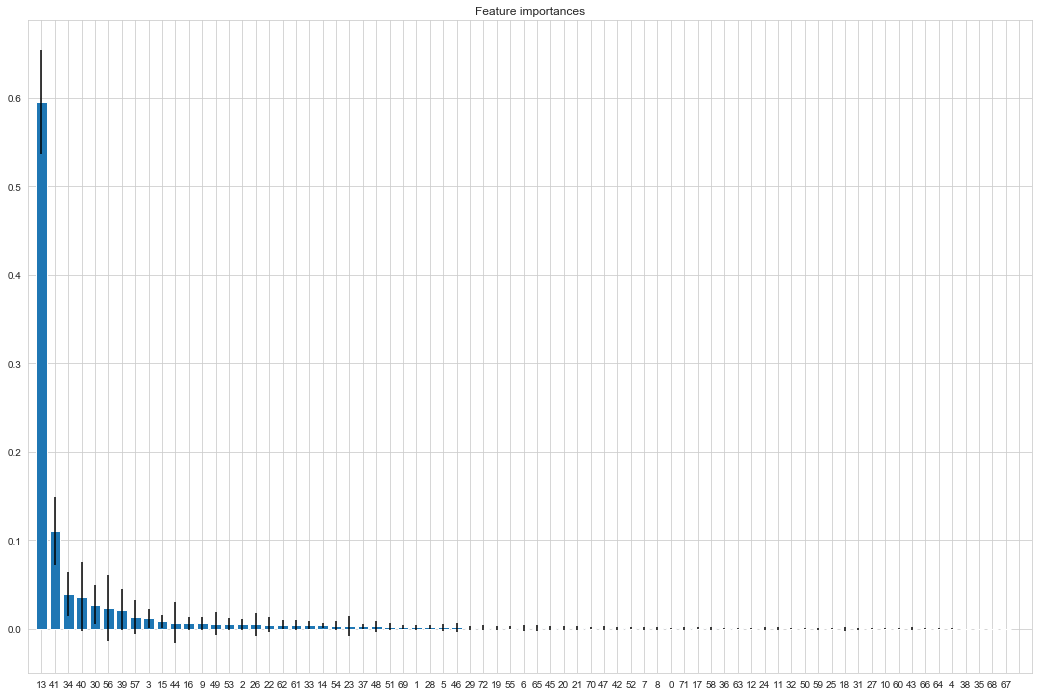

In [40]:
importances = rf_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(train.shape[1] - 1):
    print("%d. %s -- feature %d (%f)" % (f + 1, train.columns[indices[f]], indices[f], importances[indices[f]]))

plt.figure(figsize=(18, 12))
plt.title("Feature importances")
plt.bar(range(train.drop(['SalePrice'], axis=1).shape[1]), importances[indices],
       yerr=std[indices], align="center")
plt.xticks(range(train.shape[1]), indices)
plt.xlim([-1, train.shape[1]])
plt.show()

Leave first 35 features

In [41]:
indices[:35]

array([13, 41, 34, 40, 30, 56, 39, 57,  3, 15, 44, 16,  9, 49, 53,  2, 26,
       22, 62, 61, 33, 14, 54, 23, 37, 48, 51, 69,  1, 28,  5, 46, 29, 72,
       19], dtype=int64)

In [42]:
columns_to_models = train.columns[indices[:35]]

In [43]:
columns_to_models = list(columns_to_models)

In [44]:
columns_to_models.append('SalePrice')

In [45]:
columns_to_models

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 '2ndFlrSF',
 'BsmtFinSF1',
 'GarageCars',
 '1stFlrSF',
 'GarageArea',
 'LotArea',
 'YearBuilt',
 'FullBath',
 'YearRemodAdd',
 'Neighborhood',
 'TotRmsAbvGrd',
 'GarageType',
 'LotFrontage',
 'BsmtQual',
 'MasVnrArea',
 'OpenPorchSF',
 'WoodDeckSF',
 'BsmtUnfSF',
 'OverallCond',
 'GarageYrBlt',
 'ExterQual',
 'CentralAir',
 'KitchenQual',
 'Fireplaces',
 'MoSold',
 'MSZoning',
 'BsmtExposure',
 'LotShape',
 'BedroomAbvGr',
 'BsmtFinType1',
 'SaleCondition',
 'Exterior1st',
 'SalePrice']

In [46]:
train_test = train_test[columns_to_models]

In [47]:
train_test.shape

(2919, 36)

In [48]:
train_test.head()

OverallQual  GrLivArea  TotalBsmtSF  2ndFlrSF  BsmtFinSF1  GarageCars  \
0            7       1710        856.0       854       706.0         2.0   
1            6       1262       1262.0         0       978.0         2.0   
2            7       1786        920.0       866       486.0         2.0   
3            7       1717        756.0       756       216.0         3.0   
4            8       2198       1145.0      1053       655.0         3.0   

   1stFlrSF  GarageArea  LotArea  YearBuilt  FullBath  YearRemodAdd  \
0       856       548.0     8450       2003         2          2003   
1      1262       460.0     9600       1976         2          1976   
2       920       608.0    11250       2001         2          2002   
3       961       642.0     9550       1915         1          1970   
4      1145       836.0    14260       2000         2          2000   

  Neighborhood  TotRmsAbvGrd GarageType  LotFrontage BsmtQual  MasVnrArea  \
0      CollgCr             8     Attchd         65.0       Gd       196.0   
1      Veenker             6     Attchd         80.0       Gd         0.0   
2      CollgCr             6     Attchd         68.0       Gd       162.0   
3      Crawfor             7     Detchd         60.0       TA         0.0   
4      NoRidge             9     Attchd         84.0       Gd       350.0   

   OpenPorchSF  WoodDeckSF  BsmtUnfSF OverallCond  GarageYrBlt ExterQual  \
0           61           0      150.0           5       2003.0        Gd   
1            0         298      284.0           8       1976.0        TA   
2           42           0      434.0           5       2001.0        Gd   
3           35           0      540.0           5       1998.0        TA   
4           84         192      490.0           5       2000.0        Gd   

  CentralAir KitchenQual  Fireplaces MoSold MSZoning BsmtExposure LotShape  \
0          Y          Gd           0      2       RL           No      Reg   
1          Y          TA           1      5       RL           Gd      Reg   
2          Y          Gd           1      9       RL           Mn      IR1   
3          Y          Gd           1      2       RL           No      IR1   
4          Y          Gd           1     12       RL           Av      IR1   

   BedroomAbvGr BsmtFinType1 SaleCondition Exterior1st  SalePrice  
0             3          GLQ        Normal     VinylSd   208500.0  
1             3          ALQ        Normal     MetalSd   181500.0  
2             3          GLQ        Normal     VinylSd   223500.0  
3             3          ALQ       Abnorml     Wd Sdng   140000.0  
4             4          GLQ        Normal     VinylSd   250000.0

**Scaling and dummy encoding**

In [49]:
scaler = StandardScaler()

In [50]:
new_numeric = []

for col in numeric:
    if col in columns_to_models:
        new_numeric.append(col)

In [51]:
new_numeric

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'GarageYrBlt']

In [52]:
new_cat = []

for col in categorical:
    if col in columns_to_models:
        new_cat.append(col)

In [53]:
new_cat

['ExterQual',
 'Neighborhood',
 'BsmtQual',
 'TotRmsAbvGrd',
 'OverallQual',
 'OverallCond',
 'CentralAir',
 'GarageType',
 'Fireplaces',
 'LotShape',
 'BsmtExposure',
 'SaleCondition',
 'BsmtFinType1',
 'FullBath',
 'GarageCars',
 'MoSold',
 'MSZoning',
 'Exterior1st',
 'KitchenQual',
 'BedroomAbvGr']

In [54]:
train_test[new_numeric] = scaler.fit_transform(train_test[new_numeric])

In [55]:
train_test.head()

OverallQual  GrLivArea  TotalBsmtSF  2ndFlrSF  BsmtFinSF1  GarageCars  \
0            7   0.413547    -0.444277  1.207379    0.581145         2.0   
1            6  -0.471891     0.477159 -0.785025    1.178255         2.0   
2            7   0.563755    -0.299026  1.235375    0.098189         2.0   
3            7   0.427382    -0.671231  0.978742   -0.494529         3.0   
4            8   1.378042     0.211622  1.671651    0.469187         3.0   

   1stFlrSF  GarageArea   LotArea  YearBuilt  FullBath  YearRemodAdd  \
0 -0.773861    0.349364 -0.217879   1.046258         2      0.896833   
1  0.261075   -0.058991 -0.072044   0.154764         2     -0.395604   
2 -0.610718    0.627787  0.137197   0.980221         2      0.848965   
3 -0.506205    0.785561 -0.078385  -1.859351         1     -0.682812   
4 -0.037170    1.685798  0.518903   0.947203         2      0.753229   

  Neighborhood  TotRmsAbvGrd GarageType  LotFrontage BsmtQual  MasVnrArea  \
0      CollgCr             8     Attchd    -0.199675       Gd    0.529034   
1      Veenker             6     Attchd     0.504253       Gd   -0.567016   
2      CollgCr             6     Attchd    -0.058890       Gd    0.338903   
3      Crawfor             7     Detchd    -0.434318       TA   -0.567016   
4      NoRidge             9     Attchd     0.691967       Gd    1.390216   

   OpenPorchSF  WoodDeckSF  BsmtUnfSF OverallCond  GarageYrBlt ExterQual  \
0     0.200006   -0.740760  -0.934165           5     0.997778        Gd   
1    -0.702843    1.614879  -0.629284           8    -0.088051        TA   
2    -0.081209   -0.740760  -0.287999           5     0.917347        Gd   
3    -0.184815   -0.740760  -0.046824           5     0.796699        TA   
4     0.540424    0.776967  -0.160586           5     0.877131        Gd   

  CentralAir KitchenQual  Fireplaces MoSold MSZoning BsmtExposure LotShape  \
0          Y          Gd           0      2       RL           No      Reg   
1          Y          TA           1      5       RL           Gd      Reg   
2          Y          Gd           1      9       RL           Mn      IR1   
3          Y          Gd           1      2       RL           No      IR1   
4          Y          Gd           1     12       RL           Av      IR1   

   BedroomAbvGr BsmtFinType1 SaleCondition Exterior1st  SalePrice  
0             3          GLQ        Normal     VinylSd   208500.0  
1             3          ALQ        Normal     MetalSd   181500.0  
2             3          GLQ        Normal     VinylSd   223500.0  
3             3          ALQ       Abnorml     Wd Sdng   140000.0  
4             4          GLQ        Normal     VinylSd   250000.0

In [56]:
for col in new_cat:
    if col != 'SalePrice':
        train_test[col] = LE.fit_transform(train_test[col])

In [57]:
train_test.head()

OverallQual  GrLivArea  TotalBsmtSF  2ndFlrSF  BsmtFinSF1  GarageCars  \
0            6   0.413547    -0.444277  1.207379    0.581145           2   
1            5  -0.471891     0.477159 -0.785025    1.178255           2   
2            6   0.563755    -0.299026  1.235375    0.098189           2   
3            6   0.427382    -0.671231  0.978742   -0.494529           3   
4            7   1.378042     0.211622  1.671651    0.469187           3   

   1stFlrSF  GarageArea   LotArea  YearBuilt  FullBath  YearRemodAdd  \
0 -0.773861    0.349364 -0.217879   1.046258         2      0.896833   
1  0.261075   -0.058991 -0.072044   0.154764         2     -0.395604   
2 -0.610718    0.627787  0.137197   0.980221         2      0.848965   
3 -0.506205    0.785561 -0.078385  -1.859351         1     -0.682812   
4 -0.037170    1.685798  0.518903   0.947203         2      0.753229   

   Neighborhood  TotRmsAbvGrd  GarageType  LotFrontage  BsmtQual  MasVnrArea  \
0             5             6           1    -0.199675         2    0.529034   
1            24             4           1     0.504253         2   -0.567016   
2             5             4           1    -0.058890         2    0.338903   
3             6             5           5    -0.434318         4   -0.567016   
4            15             7           1     0.691967         2    1.390216   

   OpenPorchSF  WoodDeckSF  BsmtUnfSF  OverallCond  GarageYrBlt  ExterQual  \
0     0.200006   -0.740760  -0.934165            4     0.997778          2   
1    -0.702843    1.614879  -0.629284            7    -0.088051          3   
2    -0.081209   -0.740760  -0.287999            4     0.917347          2   
3    -0.184815   -0.740760  -0.046824            4     0.796699          3   
4     0.540424    0.776967  -0.160586            4     0.877131          2   

   CentralAir  KitchenQual  Fireplaces  MoSold  MSZoning  BsmtExposure  \
0           1            2           0       4         3             3   
1           1            3           1       7         3             1   
2           1            2           1      11         3             2   
3           1            2           1       4         3             3   
4           1            2           1       3         3             0   

   LotShape  BedroomAbvGr  BsmtFinType1  SaleCondition  Exterior1st  SalePrice  
0         3             3             2              4           12   208500.0  
1         3             3             0              4            8   181500.0  
2         0             3             2              4           12   223500.0  
3         0             3             0              0           13   140000.0  
4         0             4             2              4           12   250000.0

In [58]:
train_test_lin = train_test.copy()

In [59]:
train_test_lin = pd.concat([train_test_lin, 
                     pd.get_dummies(train_test_lin['ExterQual'], prefix='ExterQual', drop_first=True),
                     pd.get_dummies(train_test_lin['Neighborhood'], prefix='Neighborhood', drop_first=True), 
                     pd.get_dummies(train_test_lin['BsmtQual'], prefix='BsmtQual', drop_first=True),
                     pd.get_dummies(train_test_lin['TotRmsAbvGrd'], prefix='TotRmsAbvGrd', drop_first=True),
                     pd.get_dummies(train_test_lin['OverallQual'], prefix='OverallQual', drop_first=True), 
                     pd.get_dummies(train_test_lin['OverallCond'], prefix='OverallCond', drop_first=True),
                     pd.get_dummies(train_test_lin['CentralAir'], prefix='CentralAir', drop_first=True),
                     pd.get_dummies(train_test_lin['GarageType'], prefix='GarageType', drop_first=True),
                     pd.get_dummies(train_test_lin['Fireplaces'], prefix='Fireplaces', drop_first=True),
                     pd.get_dummies(train_test_lin['LotShape'], prefix='LotShape', drop_first=True),
                     pd.get_dummies(train_test_lin['BsmtExposure'], prefix='BsmtExposure', drop_first=True),
                     pd.get_dummies(train_test_lin['SaleCondition'], prefix='SaleCondition', drop_first=True),
                     pd.get_dummies(train_test_lin['BsmtFinType1'], prefix='BsmtFinType1', drop_first=True),
                     pd.get_dummies(train_test_lin['FullBath'], prefix='FullBath', drop_first=True),   
                     pd.get_dummies(train_test_lin['GarageCars'], prefix='GarageCars', drop_first=True),
                     pd.get_dummies(train_test_lin['MoSold'], prefix='MoSold', drop_first=True),
                     pd.get_dummies(train_test_lin['MSZoning'], prefix='MSZoning', drop_first=True),
                     pd.get_dummies(train_test_lin['Exterior1st'], prefix='Exterior1st', drop_first=True),   
                     pd.get_dummies(train_test_lin['KitchenQual'], prefix='KitchenQual', drop_first=True),
                     pd.get_dummies(train_test_lin['BedroomAbvGr'], prefix='BedroomAbvGr', drop_first=True)
                       ],
                    axis=1)

In [60]:
train_test_lin.drop(['ExterQual',
 'Neighborhood',
 'BsmtQual',
 'TotRmsAbvGrd',
 'OverallQual',
 'OverallCond',
 'CentralAir',
 'GarageType',
 'Fireplaces',
 'LotShape',
 'BsmtExposure',
 'SaleCondition',
 'BsmtFinType1',
 'FullBath',
 'GarageCars',
 'MoSold',
 'MSZoning',
 'Exterior1st',
 'KitchenQual',
 'BedroomAbvGr'], axis=1, inplace=True)

In [61]:
train_test.sample(10)

OverallQual  GrLivArea  TotalBsmtSF  2ndFlrSF  BsmtFinSF1  GarageCars  \
1213            6   0.093367     0.710922 -0.785025    1.356070           2   
843             7   0.646765     0.558863  0.451478   -0.968705           3   
1217            7  -0.369117     0.563402 -0.785025    1.086054           2   
1438            5  -0.523278    -0.317182 -0.785025    0.348448           2   
1356            4  -0.989714    -0.117462 -0.785025   -0.740398           2   
594             4  -1.139922    -0.289947 -0.785025   -0.968705           1   
427             3  -1.173521    -0.328530 -0.785025   -0.336471           1   
1324            7   0.581543     1.686827 -0.785025   -0.968705           3   
910             4   1.528250     0.120840  1.942282    0.003793           2   
417             5   2.219999     0.722270  2.140589    1.507543           3   

      1stFlrSF  GarageArea   LotArea  YearBuilt  FullBath  YearRemodAdd  \
1213  0.990118   -0.393100 -0.899877   1.079276         2      0.944701   
843   0.352842    1.871414  0.071508   1.145312         2      1.088305   
1217  0.393628    0.367925 -0.193784   1.244367         2      1.184041   
1438  0.194798    2.089513 -0.350144  -0.472583         1      0.561757   
1356 -0.406790    0.474654  0.365460  -0.274474         1     -1.017889   
594  -0.600522   -0.894263 -0.276213   0.121746         1     -0.443472   
427  -0.643857   -0.560154 -0.199744  -0.472583         1     -1.305097   
1324  1.619747    1.959582 -0.023094   1.145312         2      1.088305   
910  -0.139134    0.033817  0.181581  -0.373528         2     -1.161493   
417   0.536378    1.815729  1.553695  -1.760296         2     -1.640173   

      Neighborhood  TotRmsAbvGrd  GarageType  LotFrontage  BsmtQual  \
1213             0             5           1    -0.011961         2   
843             16             5           3     1.067395         2   
1217            21             4           1     0.128824         2   
1438            17             4           1     0.973538         4   
1356             4             2           1     0.832752         2   
594              5             3           5     0.879681         2   
427             12             3           5     0.363467         4   
1324            21             5           1     0.269610         0   
910             12            10           5     0.504253         4   
417              6             8           5     0.785824         2   

      MasVnrArea  OpenPorchSF  WoodDeckSF  BsmtUnfSF  OverallCond  \
1213   -0.466358    -0.406827    0.389630  -0.579229            4   
843    -0.567016    -0.110811   -0.740760   1.677802            4   
1217   -0.164385     0.954847    0.326392  -0.447265            4   
1438   -0.567016     1.635684   -0.740760  -0.565577            6   
1356   -0.567016    -0.702843    1.140589  -1.170789            5   
594    -0.567016    -0.702843   -0.740760   0.826865            5   
427    -0.567016    -0.702843   -0.740760   0.132919            5   
1324    1.826400     0.022396   -0.740760   2.808592            4   
910     1.451729    -0.702843   -0.740760   0.230754            4   
417    -0.567016    -0.702843   -0.740760  -0.724843            5   

      GarageYrBlt  ExterQual  CentralAir  KitchenQual  Fireplaces  MoSold  \
1213     1.037994          2           1            2           1      11   
843      1.118426          2           1            2           0       4   
1217     1.239074          2           1            2           0      11   
1438    -0.852152          3           1            3           0       6   
1356     0.595619          3           1            3           2       6   
594      0.113029          3           1            3           0       6   
427     -0.570641          3           1            3           0       9   
1324     1.158642          2           1            2           1       4   
910     -0.731505          3           1            3           0       0  

In [62]:
train_test_lin.sample(10)

GrLivArea  TotalBsmtSF  2ndFlrSF  BsmtFinSF1  1stFlrSF  GarageArea  \
781   -0.910657    -0.026680 -0.785025    0.719446 -0.304826    0.121984   
395   -0.705109     0.209353 -0.785025    0.653589 -0.039719    0.572103   
614   -1.720991    -0.957194 -0.785025   -0.639416 -1.349958   -2.193574   
355   -1.400810    -0.970811 -0.785025   -0.968705 -0.937004   -0.861780   
504   -0.353305    -0.446546  0.304498   -0.404524 -0.776410   -0.151799   
78     1.516392    -1.601745  1.806966   -0.968705 -0.006581    0.702034   
495   -1.543112    -0.752935 -0.785025    0.117947 -1.120539   -2.193574   
289   -0.207050    -0.802865  0.843427   -0.968705 -1.176619   -0.411662   
1357  -1.365234    -0.612223 -0.785025    0.205757 -0.891120    0.479295   
1260   0.344372    -0.478320  1.041734   -0.968705 -0.682093    0.135905   

       LotArea  YearBuilt  YearRemodAdd  LotFrontage  MasVnrArea  OpenPorchSF  \
781  -0.753789   0.121746     -0.443472    -0.011961   -0.567016     0.777237   
395  -0.075722  -0.505602     -1.352965    -0.058890   -0.567016    -0.702843   
614  -1.100368   0.022691     -0.587076    -2.264531   -0.567016    -0.347624   
355  -0.209002  -1.595205     -1.640173    -0.434318   -0.567016    -0.702843   
504  -0.996762   0.088727     -0.491340    -2.123745   -0.567016    -0.702843   
78   -0.148132  -2.684808      0.848965    -0.903603   -0.567016     0.895644   
495  -0.290289  -1.694260     -1.640173    -0.434318   -0.567016     7.037975   
289  -0.182371  -1.859351      0.896833    -0.434318   -0.567016    -0.702843   
1357  0.082667  -0.010327     -0.587076     0.128824    0.288574    -0.702843   
1260  1.840545   0.914184      0.705361    -0.011961   -0.567016     0.821640   

      WoodDeckSF  BsmtUnfSF  GarageYrBlt  SalePrice  ExterQual_1  ExterQual_2  \
781    -0.740760  -0.658862    -0.128267        NaN            0            0   
395    -0.392948  -0.353981    -0.892368   129000.0            0            0   
614     0.018103  -1.275450     0.072813    75500.0            0            0   
355    -0.740760   0.144295    -0.610857        NaN            0            1   
504     1.314496  -1.041101    -0.168482   147000.0            0            0   
78     -0.740760  -0.488219     0.997778        NaN            0            1   
495    -0.740760  -0.763522     0.072813    34900.0            0            0   
289    -0.740760   0.312662     0.997778   153575.0            0            0   
1357   -0.740760  -1.075229    -0.208698        NaN            0            0   
1260   -0.740760   0.638021     0.836915   181000.0            0            0   

      ExterQual_3  Neighborhood_1  Neighborhood_2  Neighborhood_3  \
781             1               0               0               0   
395             1               0               0               0   
614             1               0               0               0   
355             0               0               0               0   
504             1               0               0               0   
78              0               0               0               0   
495             1               0               0               0   
289             1               0               0               1   
1357            1               0               0               0   
1260            1               0               0               0   

      Neighborhood_4  Neighborhood_5  Neighborhood_6  Neighborhood_7  \
781                0               0               0               0   
395                0               0               0               1   
614                0               0               0               0   
355                0               0               0               0   
504                0               0               0               0   
78                 0               0               0               0   
495                0               0               0               0   
289                0               0             

In [63]:
train_test.shape, train_test_lin.shape

((2919, 36), (2919, 154))

**SPLIT THE DATA FOR LINEAR MODEL AND BOOSTS + NN**

In [64]:
train_to_model = train_test[train_test['SalePrice'].isna() == False]
test_to_model = train_test[train_test['SalePrice'].isna() == True]
train_to_model_lin = train_test_lin[train_test_lin['SalePrice'].isna() == False]
test_to_model_lin = train_test_lin[train_test_lin['SalePrice'].isna() == True]

In [65]:
train_to_model.head()

OverallQual  GrLivArea  TotalBsmtSF  2ndFlrSF  BsmtFinSF1  GarageCars  \
0            6   0.413547    -0.444277  1.207379    0.581145           2   
1            5  -0.471891     0.477159 -0.785025    1.178255           2   
2            6   0.563755    -0.299026  1.235375    0.098189           2   
3            6   0.427382    -0.671231  0.978742   -0.494529           3   
4            7   1.378042     0.211622  1.671651    0.469187           3   

   1stFlrSF  GarageArea   LotArea  YearBuilt  FullBath  YearRemodAdd  \
0 -0.773861    0.349364 -0.217879   1.046258         2      0.896833   
1  0.261075   -0.058991 -0.072044   0.154764         2     -0.395604   
2 -0.610718    0.627787  0.137197   0.980221         2      0.848965   
3 -0.506205    0.785561 -0.078385  -1.859351         1     -0.682812   
4 -0.037170    1.685798  0.518903   0.947203         2      0.753229   

   Neighborhood  TotRmsAbvGrd  GarageType  LotFrontage  BsmtQual  MasVnrArea  \
0             5             6           1    -0.199675         2    0.529034   
1            24             4           1     0.504253         2   -0.567016   
2             5             4           1    -0.058890         2    0.338903   
3             6             5           5    -0.434318         4   -0.567016   
4            15             7           1     0.691967         2    1.390216   

   OpenPorchSF  WoodDeckSF  BsmtUnfSF  OverallCond  GarageYrBlt  ExterQual  \
0     0.200006   -0.740760  -0.934165            4     0.997778          2   
1    -0.702843    1.614879  -0.629284            7    -0.088051          3   
2    -0.081209   -0.740760  -0.287999            4     0.917347          2   
3    -0.184815   -0.740760  -0.046824            4     0.796699          3   
4     0.540424    0.776967  -0.160586            4     0.877131          2   

   CentralAir  KitchenQual  Fireplaces  MoSold  MSZoning  BsmtExposure  \
0           1            2           0       4         3             3   
1           1            3           1       7         3             1   
2           1            2           1      11         3             2   
3           1            2           1       4         3             3   
4           1            2           1       3         3             0   

   LotShape  BedroomAbvGr  BsmtFinType1  SaleCondition  Exterior1st  SalePrice  
0         3             3             2              4           12   208500.0  
1         3             3             0              4            8   181500.0  
2         0             3             2              4           12   223500.0  
3         0             3             0              0           13   140000.0  
4         0             4             2              4           12   250000.0

In [66]:
test_to_model.head()

OverallQual  GrLivArea  TotalBsmtSF  2ndFlrSF  BsmtFinSF1  GarageCars  \
0            4  -1.195262    -0.385268 -0.785025    0.058675           1   
1            5  -0.339470     0.629219 -0.785025    1.057516           1   
2            4   0.253457    -0.280869  0.850426    0.767742           2   
3            5   0.204046    -0.285408  0.796766    0.352839           2   
4            7  -0.436315     0.518011 -0.785025   -0.391353           2   

   1stFlrSF  GarageArea   LotArea  YearBuilt  FullBath  YearRemodAdd  \
0 -0.671897    1.193916  0.184371  -0.340510         1     -1.113625   
1  0.431865   -0.745770  0.519791  -0.439565         1     -1.257229   
2 -0.590326    0.043097  0.464374   0.848148         2      0.657493   
3 -0.595424   -0.012587 -0.024109   0.881166         2      0.657493   
4  0.306959    0.154467 -0.654748   0.683057         2      0.370284   

   Neighborhood  TotRmsAbvGrd  GarageType  LotFrontage  BsmtQual  MasVnrArea  \
0            12             3           1     0.504253         4   -0.567016   
1            12             4           1     0.551181         4    0.036930   
2             8             4           1     0.222681         2   -0.567016   
3             8             5           1     0.410396         4   -0.455174   
4            22             3           1    -1.232103         2   -0.567016   

   OpenPorchSF  WoodDeckSF  BsmtUnfSF  OverallCond  GarageYrBlt  ExterQual  \
0    -0.702843    0.365916  -0.661137            5    -0.691289          3   
1    -0.170014    2.365838  -0.351705            5    -0.811937          3   
2    -0.199616    0.935064  -0.963743            4     0.756483          3   
3    -0.170014    2.104979  -0.538274            5     0.796699          3   
4     0.510823   -0.740760   1.038461            4     0.555404          2   

   CentralAir  KitchenQual  Fireplaces  MoSold  MSZoning  BsmtExposure  \
0           1            3           0       8         2             3   
1           1            2           0       8         3             3   
2           1            3           1       5         3             3   
3           1            2           1       8         3             3   
4           1            2           0       0         3             3   

   LotShape  BedroomAbvGr  BsmtFinType1  SaleCondition  Exterior1st  SalePrice  
0         3             2             5              4           12        NaN  
1         0             3             0              4           13        NaN  
2         0             3             2              4           12        NaN  
3         0             3             2              4           12        NaN  
4         0             2             0              4            6        NaN

In [67]:
train_to_model_lin.head()

GrLivArea  TotalBsmtSF  2ndFlrSF  BsmtFinSF1  1stFlrSF  GarageArea  \
0   0.413547    -0.444277  1.207379    0.581145 -0.773861    0.349364   
1  -0.471891     0.477159 -0.785025    1.178255  0.261075   -0.058991   
2   0.563755    -0.299026  1.235375    0.098189 -0.610718    0.627787   
3   0.427382    -0.671231  0.978742   -0.494529 -0.506205    0.785561   
4   1.378042     0.211622  1.671651    0.469187 -0.037170    1.685798   

    LotArea  YearBuilt  YearRemodAdd  LotFrontage  MasVnrArea  OpenPorchSF  \
0 -0.217879   1.046258      0.896833    -0.199675    0.529034     0.200006   
1 -0.072044   0.154764     -0.395604     0.504253   -0.567016    -0.702843   
2  0.137197   0.980221      0.848965    -0.058890    0.338903    -0.081209   
3 -0.078385  -1.859351     -0.682812    -0.434318   -0.567016    -0.184815   
4  0.518903   0.947203      0.753229     0.691967    1.390216     0.540424   

   WoodDeckSF  BsmtUnfSF  GarageYrBlt  SalePrice  ExterQual_1  ExterQual_2  \
0   -0.740760  -0.934165     0.997778   208500.0            0            1   
1    1.614879  -0.629284    -0.088051   181500.0            0            0   
2   -0.740760  -0.287999     0.917347   223500.0            0            1   
3   -0.740760  -0.046824     0.796699   140000.0            0            0   
4    0.776967  -0.160586     0.877131   250000.0            0            1   

   ExterQual_3  Neighborhood_1  Neighborhood_2  Neighborhood_3  \
0            0               0               0               0   
1            1               0               0               0   
2            0               0               0               0   
3            1               0               0               0   
4            0               0               0               0   

   Neighborhood_4  Neighborhood_5  Neighborhood_6  Neighborhood_7  \
0               0               1               0               0   
1               0               0               0               0   
2               0               1               0               0   
3               0               0               1               0   
4               0               0               0               0   

   Neighborhood_8  Neighborhood_9  Neighborhood_10  Neighborhood_11  \
0               0               0                0                0   
1               0               0                0                0   
2               0               0                0                0   
3               0               0                0                0   
4               0               0                0                0   

   Neighborhood_12  Neighborhood_13  Neighborhood_14  Neighborhood_15  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                1   

   Neighborhood_16  Neighborhood_17  Neighborhood_18  Neighborhood_19  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Neighborhood_20  Neighborhood_21  Neighborhood_22  Neighborhood_23  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Neighborhood_24  BsmtQual_1  BsmtQual_2  BsmtQual_3  BsmtQual_4  \


In [68]:
test_to_model_lin.head()

GrLivArea  TotalBsmtSF  2ndFlrSF  BsmtFinSF1  1stFlrSF  GarageArea  \
0  -1.195262    -0.385268 -0.785025    0.058675 -0.671897    1.193916   
1  -0.339470     0.629219 -0.785025    1.057516  0.431865   -0.745770   
2   0.253457    -0.280869  0.850426    0.767742 -0.590326    0.043097   
3   0.204046    -0.285408  0.796766    0.352839 -0.595424   -0.012587   
4  -0.436315     0.518011 -0.785025   -0.391353  0.306959    0.154467   

    LotArea  YearBuilt  YearRemodAdd  LotFrontage  MasVnrArea  OpenPorchSF  \
0  0.184371  -0.340510     -1.113625     0.504253   -0.567016    -0.702843   
1  0.519791  -0.439565     -1.257229     0.551181    0.036930    -0.170014   
2  0.464374   0.848148      0.657493     0.222681   -0.567016    -0.199616   
3 -0.024109   0.881166      0.657493     0.410396   -0.455174    -0.170014   
4 -0.654748   0.683057      0.370284    -1.232103   -0.567016     0.510823   

   WoodDeckSF  BsmtUnfSF  GarageYrBlt  SalePrice  ExterQual_1  ExterQual_2  \
0    0.365916  -0.661137    -0.691289        NaN            0            0   
1    2.365838  -0.351705    -0.811937        NaN            0            0   
2    0.935064  -0.963743     0.756483        NaN            0            0   
3    2.104979  -0.538274     0.796699        NaN            0            0   
4   -0.740760   1.038461     0.555404        NaN            0            1   

   ExterQual_3  Neighborhood_1  Neighborhood_2  Neighborhood_3  \
0            1               0               0               0   
1            1               0               0               0   
2            1               0               0               0   
3            1               0               0               0   
4            0               0               0               0   

   Neighborhood_4  Neighborhood_5  Neighborhood_6  Neighborhood_7  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   Neighborhood_8  Neighborhood_9  Neighborhood_10  Neighborhood_11  \
0               0               0                0                0   
1               0               0                0                0   
2               1               0                0                0   
3               1               0                0                0   
4               0               0                0                0   

   Neighborhood_12  Neighborhood_13  Neighborhood_14  Neighborhood_15  \
0                1                0                0                0   
1                1                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Neighborhood_16  Neighborhood_17  Neighborhood_18  Neighborhood_19  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Neighborhood_20  Neighborhood_21  Neighborhood_22  Neighborhood_23  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                1                0   

   Neighborhood_24  BsmtQual_1  BsmtQual_2  BsmtQual_3  BsmtQual_4  \


In [69]:
test_to_model.drop(['SalePrice'], axis=1, inplace=True)
test_to_model_lin.drop(['SalePrice'], axis=1, inplace=True)

In [70]:
train_to_model.shape, test_to_model.shape, train_to_model_lin.shape, test_to_model_lin.shape

((1460, 36), (1459, 35), (1460, 154), (1459, 153))

In [71]:
X_train, X_test, y_train, y_test = train_test_split(train_to_model.drop(['SalePrice'], axis=1), \
                                                    train_to_model['SalePrice'], test_size=0.2, random_state=42)

In [72]:
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(train_to_model_lin.drop(['SalePrice'], axis=1), \
                                                    train_to_model_lin['SalePrice'], test_size=0.2, random_state=42)

In [73]:
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

X_train shape : (1168, 35)
X_test shape : (292, 35)
y_train shape : (1168,)
y_test shape : (292,)


In [74]:
print('X_train_lin shape :', X_train_lin.shape)
print('X_test_lin shape :', X_test_lin.shape)
print('y_train_lin shape :', y_train_lin.shape)
print('y_test_lin shape :', y_test_lin.shape)

X_train_lin shape : (1168, 153)
X_test_lin shape : (292, 153)
y_train_lin shape : (1168,)
y_test_lin shape : (292,)


## 4. Modeling

In [75]:
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

In [76]:
%%time
lgb_reg = lgbm.LGBMRegressor(objective='regression', learning_rate=0.01, n_estimators=1000, n_jobs=-1)
lgb_param_grid = {"learning_rate":[0.1, 0.01, 0.001],
                   "max_depth":[2, 3, 4, 5]
                  }
                  
grid_search = GridSearchCV(lgb_reg, param_grid=lgb_param_grid, cv=kfolds, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

lgb_reg = grid_search.best_estimator_
print(grid_search.best_params_)

y_pred = lgb_reg.predict(X_test)

print('-' * 10 + 'LGBM' + '-' * 10)
print('R square Accuracy: ', r2_score(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    4.2s


{'learning_rate': 0.1, 'max_depth': 3}
----------LGBM----------
R square Accuracy:  0.8774527297062437
Mean Absolute Error:  17147.634088206705
Mean Squared Error:  939977538.9534435
Wall time: 7.26 s


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    7.0s finished


In [77]:
%%time
xgb_reg = xgb.XGBRegressor(learning_rate=0.01, n_estimators=1000, n_jobs=-1, booster='gbtree', random_state=42)
xgb_param_grid = {"learning_rate":[0.1, 0.01, 0.001],
                   "max_depth":[2, 3, 4, 5]
                  }
                  
grid_search = GridSearchCV(xgb_reg, param_grid=xgb_param_grid, cv=kfolds, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

xgb_reg = grid_search.best_estimator_
print(grid_search.best_params_)

y_pred = xgb_reg.predict(X_test)

print('-' * 10 + 'XGB' + '-' * 10)
print('R square Accuracy: ', r2_score(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   12.4s finished


[10:01:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'learning_rate': 0.1, 'max_depth': 4}
----------XGB----------
R square Accuracy:  0.9143233984452551
Mean Absolute Error:  16211.163728060788
Mean Squared Error:  657167482.2480891
Wall time: 14.2 s


In [78]:
%%time
cat_reg = cat.CatBoostRegressor(learning_rate=0.01, n_estimators=1000, objective='RMSE', loss_function='R2', random_state=42)
cat_param_grid = {"learning_rate":[0.1, 0.01, 0.001],
                   "max_depth":[2, 3, 4, 5]
                  }
                  
grid_search = GridSearchCV(cat_reg, param_grid=cat_param_grid, cv=kfolds, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

cat_reg = grid_search.best_estimator_
print(grid_search.best_params_)

y_pred = cat_reg.predict(X_test)

print('-' * 10 + 'CatBoost' + '-' * 10)
print('R square Accuracy: ', r2_score(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   56.1s finished


0:	learn: 72283.3165842	total: 59.6ms	remaining: 59.5s
1:	learn: 68052.6849923	total: 63.3ms	remaining: 31.6s
2:	learn: 64149.1137865	total: 67ms	remaining: 22.3s
3:	learn: 61156.9371733	total: 69.8ms	remaining: 17.4s
4:	learn: 57991.9152471	total: 72.1ms	remaining: 14.4s
5:	learn: 55021.4126276	total: 74.5ms	remaining: 12.3s
6:	learn: 52659.4455506	total: 76.9ms	remaining: 10.9s
7:	learn: 50072.2108763	total: 79.6ms	remaining: 9.87s
8:	learn: 48203.3673031	total: 81.6ms	remaining: 8.99s
9:	learn: 46288.2638993	total: 83.6ms	remaining: 8.27s
10:	learn: 44452.1291990	total: 85.7ms	remaining: 7.7s
11:	learn: 42593.0714884	total: 87.4ms	remaining: 7.19s
12:	learn: 41045.2792831	total: 89ms	remaining: 6.76s
13:	learn: 39489.7910050	total: 90.5ms	remaining: 6.38s
14:	learn: 37995.6351932	total: 91.8ms	remaining: 6.03s
15:	learn: 36675.3034180	total: 93ms	remaining: 5.72s
16:	learn: 35497.8924248	total: 94.3ms	remaining: 5.45s
17:	learn: 34499.0783967	total: 95.9ms	remaining: 5.23s
18:	learn

274:	learn: 10130.2526460	total: 376ms	remaining: 992ms
275:	learn: 10114.4451499	total: 378ms	remaining: 991ms
276:	learn: 10093.8595251	total: 379ms	remaining: 989ms
277:	learn: 10063.0113671	total: 380ms	remaining: 987ms
278:	learn: 10023.7298075	total: 381ms	remaining: 985ms
279:	learn: 10016.4583030	total: 382ms	remaining: 982ms
280:	learn: 9989.1336100	total: 383ms	remaining: 980ms
281:	learn: 9962.6857823	total: 384ms	remaining: 978ms
282:	learn: 9942.7576748	total: 385ms	remaining: 976ms
283:	learn: 9913.8711084	total: 386ms	remaining: 973ms
284:	learn: 9905.9863986	total: 387ms	remaining: 971ms
285:	learn: 9881.2357285	total: 388ms	remaining: 969ms
286:	learn: 9869.4253525	total: 389ms	remaining: 967ms
287:	learn: 9848.0645584	total: 391ms	remaining: 966ms
288:	learn: 9831.6729179	total: 392ms	remaining: 964ms
289:	learn: 9828.7783324	total: 393ms	remaining: 962ms
290:	learn: 9800.9631440	total: 394ms	remaining: 960ms
291:	learn: 9776.8709303	total: 395ms	remaining: 958ms
292:

567:	learn: 5682.0347086	total: 694ms	remaining: 528ms
568:	learn: 5670.2737402	total: 695ms	remaining: 526ms
569:	learn: 5662.9796242	total: 696ms	remaining: 525ms
570:	learn: 5651.5814856	total: 697ms	remaining: 524ms
571:	learn: 5644.2550322	total: 698ms	remaining: 522ms
572:	learn: 5629.9570232	total: 699ms	remaining: 521ms
573:	learn: 5616.1555468	total: 701ms	remaining: 520ms
574:	learn: 5604.9772362	total: 702ms	remaining: 519ms
575:	learn: 5594.8675893	total: 703ms	remaining: 517ms
576:	learn: 5584.2411940	total: 704ms	remaining: 516ms
577:	learn: 5574.3714189	total: 705ms	remaining: 515ms
578:	learn: 5572.5515680	total: 706ms	remaining: 513ms
579:	learn: 5559.6537692	total: 707ms	remaining: 512ms
580:	learn: 5549.2802604	total: 708ms	remaining: 511ms
581:	learn: 5536.9465883	total: 709ms	remaining: 509ms
582:	learn: 5525.4596761	total: 710ms	remaining: 508ms
583:	learn: 5510.5259103	total: 711ms	remaining: 507ms
584:	learn: 5495.7403227	total: 712ms	remaining: 505ms
585:	learn

858:	learn: 3457.5782300	total: 1.01s	remaining: 166ms
859:	learn: 3445.9450173	total: 1.01s	remaining: 165ms
860:	learn: 3442.1668992	total: 1.01s	remaining: 164ms
861:	learn: 3434.2321984	total: 1.01s	remaining: 162ms
862:	learn: 3428.2438606	total: 1.01s	remaining: 161ms
863:	learn: 3424.7042867	total: 1.02s	remaining: 160ms
864:	learn: 3421.4213842	total: 1.02s	remaining: 159ms
865:	learn: 3419.3269740	total: 1.02s	remaining: 158ms
866:	learn: 3414.0588947	total: 1.02s	remaining: 156ms
867:	learn: 3411.2830958	total: 1.02s	remaining: 155ms
868:	learn: 3405.7385945	total: 1.02s	remaining: 154ms
869:	learn: 3400.2847066	total: 1.02s	remaining: 153ms
870:	learn: 3393.6361915	total: 1.02s	remaining: 152ms
871:	learn: 3387.3300470	total: 1.02s	remaining: 150ms
872:	learn: 3379.2325405	total: 1.03s	remaining: 149ms
873:	learn: 3375.0338442	total: 1.03s	remaining: 148ms
874:	learn: 3369.9871044	total: 1.03s	remaining: 147ms
875:	learn: 3364.0470481	total: 1.03s	remaining: 146ms
876:	learn

In [79]:
%%time
gb_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, random_state=42)
gbdt_param_grid = {"learning_rate":[0.1, 0.01, 0.001],
                   "max_depth":[2, 3, 4, 5]
                  }

                  
grid_search = GridSearchCV(gb_reg, param_grid=gbdt_param_grid, cv=kfolds, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

gb_reg = grid_search.best_estimator_
print(grid_search.best_params_)

y_pred = gb_reg.predict(X_test)

print('-' * 10 + 'GBM' + '-' * 10)
print('R square Accuracy: ', r2_score(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   35.6s finished


{'learning_rate': 0.1, 'max_depth': 2}
----------GBM----------
R square Accuracy:  0.8963111857662909
Mean Absolute Error:  16255.755713427774
Mean Squared Error:  795327029.2089767
Wall time: 38 s


In [80]:
alphas = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.1, 1, 10]

ridgecv_reg = make_pipeline(RidgeCV(alphas=alphas, cv=kfolds))
ridgecv_reg.fit(X_train_lin, y_train_lin)
y_pred = ridgecv_reg.predict(X_test_lin)

print('-' * 10 + 'RidgeCV' + '-' * 10)
print('R square Accuracy: ', r2_score(y_test_lin, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test_lin, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test_lin, y_pred))

----------RidgeCV----------
R square Accuracy:  0.8832174909257925
Mean Absolute Error:  17165.20018163389
Mean Squared Error:  895759939.8929625


In [81]:
lassocv_reg = make_pipeline(LassoCV(alphas=alphas, cv=kfolds))
lassocv_reg.fit(X_train_lin, y_train_lin)
y_pred = lassocv_reg.predict(X_test_lin)

print('-' * 10 + 'LassoCV' + '-' * 10)
print('R square Accuracy: ', r2_score(y_test_lin, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test_lin, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test_lin, y_pred))

----------LassoCV----------
R square Accuracy:  0.8831410003461463
Mean Absolute Error:  17765.174449716535
Mean Squared Error:  896346647.590625


In [82]:
alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001]
l1ratio = [0.8, 0.83, 0.85, 0.87, 0.9, 0.92, 0.95, 0.97, 0.99, 1]

elasticv_reg = make_pipeline(ElasticNetCV(alphas=alphas, cv=kfolds, l1_ratio=l1ratio))
elasticv_reg.fit(X_train_lin, y_train_lin)
y_pred = elasticv_reg.predict(X_test_lin)

print('-' * 10 + 'ElasticNetCV' + '-' * 10)
print('R square Accuracy: ', r2_score(y_test_lin, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test_lin, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test_lin, y_pred))

----------ElasticNetCV----------
R square Accuracy:  0.880990419529798
Mean Absolute Error:  18028.875741815507
Mean Squared Error:  912842303.9869355


Финальное предсказание

Попробуем блендинг моделей для улучшения качества. Применим экспоненту к данным

In [83]:
ensemble = lgb_reg.predict(test_to_model) * 0.2 + xgb_reg.predict(test_to_model) * 0.2 + cat_reg.predict(test_to_model) * 0.2 \
            + gb_reg.predict(test_to_model) * 0.1 + lassocv_reg.predict(test_to_model_lin) * 0.1 + \
            ridgecv_reg.predict(test_to_model_lin) * 0.1 + elasticv_reg.predict(test_to_model_lin) * 0.1

In [84]:
ensemble[:10]

array([125167.54993577, 163887.30954573, 184271.09307868, 195711.03053976,
       196776.18941606, 174856.94858755, 178079.95080554, 164901.90392962,
       182155.37363458, 123656.84254232])

In [85]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission_blend_free.csv',index=False)

Попробуем keras простую сеть

In [86]:
import keras
from keras import models, layers, regularizers

Using TensorFlow backend.


**ПОПРОБОВАТЬ СЕТЬ ДЛЯ НЕ ЛИНЕЙНЫХ ДАННЫХ**

In [87]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1))
    
optimizer = keras.optimizers.RMSprop(0.001)
    
model.compile(optimizer=optimizer,
              loss='mae',
              metrics=['mae', 'mse'])

In [88]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               9216      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 75,265
Trainable params: 75,265
Non-trainable params: 0
_________________________________________________________________


In [89]:
history = model.fit(X_train, y_train,
                   epochs=200,
                   batch_size=5,
                   validation_data=(X_test, y_test))

Train on 1168 samples, validate on 292 samples
Epoch 1/200
1168/1168 [==============================] - 0s 246us/step - loss: 168125.9067 - mae: 168125.8594 - mse: 34301394944.0000 - val_loss: 133457.2471 - val_mae: 133457.2656 - val_mse: 25307265024.0000
Epoch 2/200
1168/1168 [==============================] - 0s 174us/step - loss: 78630.9296 - mae: 78630.9609 - mse: 11402466304.0000 - val_loss: 54168.8972 - val_mae: 54168.8906 - val_mse: 6909206016.0000
Epoch 3/200
1168/1168 [==============================] - 0s 191us/step - loss: 47792.1472 - mae: 47792.1445 - mse: 4837792768.0000 - val_loss: 47220.2251 - val_mae: 47220.2305 - val_mse: 5358589952.0000
Epoch 4/200
1168/1168 [==============================] - 0s 181us/step - loss: 41181.1563 - mae: 41181.1562 - mse: 3760063488.0000 - val_loss: 39596.5918 - val_mae: 39596.5938 - val_mse: 4255783424.0000
Epoch 5/200
1168/1168 [==============================] - 0s 184us/step - loss: 34995.2791 - mae: 34995.2891 - mse: 2938707456.0000 - v

Epoch 41/200
1168/1168 [==============================] - 0s 171us/step - loss: 17486.3842 - mae: 17486.3828 - mse: 1211464320.0000 - val_loss: 18263.8401 - val_mae: 18263.8379 - val_mse: 905471680.0000
Epoch 42/200
1168/1168 [==============================] - 0s 174us/step - loss: 17442.5470 - mae: 17442.5449 - mse: 1222336000.0000 - val_loss: 17991.4836 - val_mae: 17991.4844 - val_mse: 916663872.0000
Epoch 43/200
1168/1168 [==============================] - 0s 187us/step - loss: 17377.8404 - mae: 17377.8418 - mse: 1217561088.0000 - val_loss: 18536.3889 - val_mae: 18536.3906 - val_mse: 963298176.0000
Epoch 44/200
1168/1168 [==============================] - 0s 196us/step - loss: 17278.3407 - mae: 17278.3320 - mse: 1232677504.0000 - val_loss: 18016.6838 - val_mae: 18016.6797 - val_mse: 926736768.0000
Epoch 45/200
1168/1168 [==============================] - 0s 181us/step - loss: 17233.0016 - mae: 17233.0059 - mse: 1209890176.0000 - val_loss: 17908.7537 - val_mae: 17908.7578 - val_mse: 

1168/1168 [==============================] - 0s 193us/step - loss: 16208.0699 - mae: 16208.0732 - mse: 1280944768.0000 - val_loss: 16668.3186 - val_mae: 16668.3164 - val_mse: 724493248.0000
Epoch 82/200
1168/1168 [==============================] - 0s 178us/step - loss: 16219.4723 - mae: 16219.4814 - mse: 1275634176.0000 - val_loss: 16798.8154 - val_mae: 16798.8145 - val_mse: 730086592.0000
Epoch 83/200
1168/1168 [==============================] - 0s 187us/step - loss: 16234.4068 - mae: 16234.4072 - mse: 1280372864.0000 - val_loss: 16696.4834 - val_mae: 16696.4844 - val_mse: 731784000.0000
Epoch 84/200
1168/1168 [==============================] - 0s 187us/step - loss: 16163.1150 - mae: 16163.1113 - mse: 1278574080.0000 - val_loss: 16900.1331 - val_mae: 16900.1348 - val_mse: 710074112.0000
Epoch 85/200
1168/1168 [==============================] - 0s 193us/step - loss: 16155.1525 - mae: 16155.1436 - mse: 1302402048.0000 - val_loss: 16588.8863 - val_mae: 16588.8848 - val_mse: 710132480.000

1168/1168 [==============================] - 0s 185us/step - loss: 15630.2694 - mae: 15630.2705 - mse: 1341125888.0000 - val_loss: 16697.8296 - val_mae: 16697.8301 - val_mse: 651000832.0000
Epoch 122/200
1168/1168 [==============================] - 0s 192us/step - loss: 15674.6967 - mae: 15674.6953 - mse: 1335082496.0000 - val_loss: 15984.9300 - val_mae: 15984.9277 - val_mse: 644804608.0000
Epoch 123/200
1168/1168 [==============================] - 0s 185us/step - loss: 15594.2285 - mae: 15594.2275 - mse: 1315840512.0000 - val_loss: 16078.9004 - val_mae: 16078.8994 - val_mse: 639403008.0000
Epoch 124/200
1168/1168 [==============================] - 0s 173us/step - loss: 15549.4781 - mae: 15549.4775 - mse: 1361726336.0000 - val_loss: 16008.4412 - val_mae: 16008.4434 - val_mse: 640200576.0000
Epoch 125/200
1168/1168 [==============================] - 0s 174us/step - loss: 15525.5245 - mae: 15525.5293 - mse: 1326523008.0000 - val_loss: 16099.5731 - val_mae: 16099.5723 - val_mse: 644043456

1168/1168 [==============================] - 0s 178us/step - loss: 15316.4412 - mae: 15316.4434 - mse: 1317023616.0000 - val_loss: 15892.1456 - val_mae: 15892.1436 - val_mse: 655791232.0000
Epoch 162/200
1168/1168 [==============================] - 0s 187us/step - loss: 15144.0354 - mae: 15144.0391 - mse: 1317289088.0000 - val_loss: 15637.6472 - val_mae: 15637.6436 - val_mse: 618639808.0000
Epoch 163/200
1168/1168 [==============================] - 0s 193us/step - loss: 15206.8656 - mae: 15206.8633 - mse: 1313101440.0000 - val_loss: 15885.3147 - val_mae: 15885.3115 - val_mse: 645599936.0000
Epoch 164/200
1168/1168 [==============================] - 0s 187us/step - loss: 15211.2460 - mae: 15211.2451 - mse: 1354518656.0000 - val_loss: 15633.3700 - val_mae: 15633.3682 - val_mse: 620155136.0000
Epoch 165/200
1168/1168 [==============================] - 0s 188us/step - loss: 15187.5269 - mae: 15187.5254 - mse: 1314576512.0000 - val_loss: 15699.5379 - val_mae: 15699.5381 - val_mse: 636929856

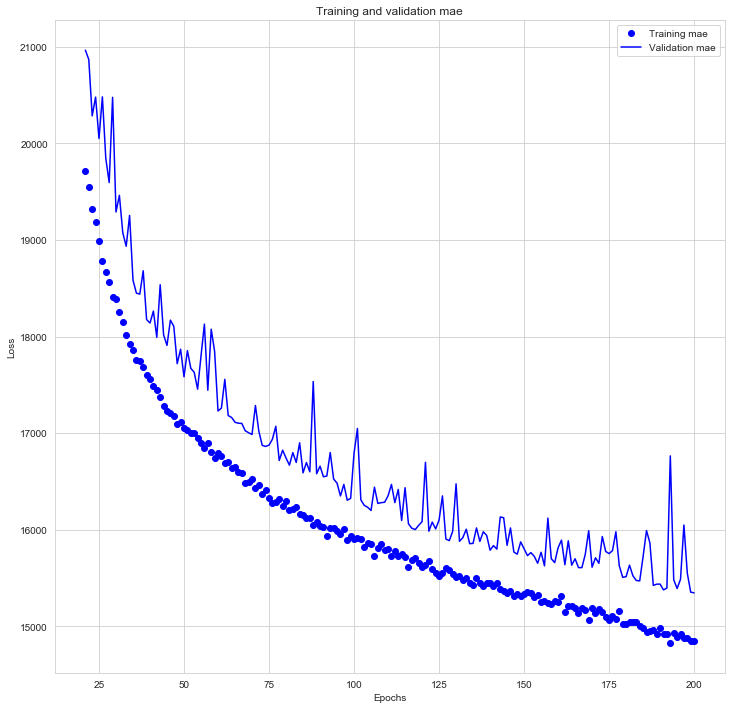

In [90]:
import matplotlib.pyplot as plt

mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(mae) + 1)

plt.figure(figsize=(12, 12))
plt.plot(epochs[20:], mae[20:], 'bo', label='Training mae')
plt.plot(epochs[20:], val_mae[20:], 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

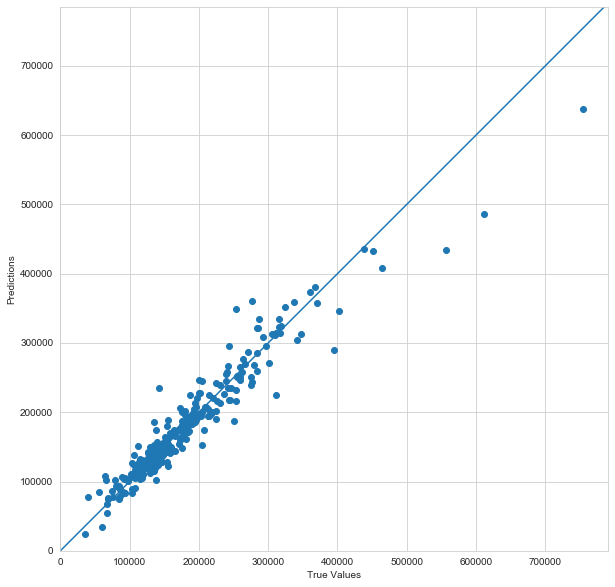

In [91]:
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize=(10, 10))
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-1000000, 1000000], [-1000000, 1000000])

In [92]:
y_pred = model.predict(X_test)

print('-' * 10 + 'NN' + '-' * 10)
print('R square Accuracy: ', r2_score(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

----------NN----------
R square Accuracy:  0.9220988272141092
Mean Absolute Error:  15346.649547838186
Mean Squared Error:  597527407.1902308


Создадим сеть заново и обучим на всем тренировочном наборе

In [93]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1))
    
optimizer = keras.optimizers.RMSprop(0.001)
    
model.compile(optimizer=optimizer,
              loss='mae',
              metrics=['mae', 'mse'])

In [94]:
history = model.fit(train_to_model.drop(['SalePrice'], axis=1), train_to_model['SalePrice'],
                   epochs=300,
                   batch_size=5,
                   validation_split=0.1)

Train on 1314 samples, validate on 146 samples
Epoch 1/300
1314/1314 [==============================] - 0s 212us/step - loss: 163651.6830 - mae: 163651.6875 - mse: 33423630336.0000 - val_loss: 113071.9565 - val_mae: 113071.9609 - val_mse: 17916819456.0000
Epoch 2/300
1314/1314 [==============================] - 0s 178us/step - loss: 66045.5744 - mae: 66045.5859 - mse: 9171600384.0000 - val_loss: 49489.1975 - val_mae: 49489.2031 - val_mse: 4623443456.0000
Epoch 3/300
1314/1314 [==============================] - 0s 166us/step - loss: 45997.0401 - mae: 45997.0547 - mse: 4759683072.0000 - val_loss: 41552.6687 - val_mae: 41552.6641 - val_mse: 3331352320.0000
Epoch 4/300
1314/1314 [==============================] - 0s 186us/step - loss: 38291.5704 - mae: 38291.5781 - mse: 3612852992.0000 - val_loss: 32830.0647 - val_mae: 32830.0625 - val_mse: 2408189952.0000
Epoch 5/300
1314/1314 [==============================] - 0s 174us/step - loss: 31340.2280 - mae: 31340.2168 - mse: 2567514880.0000 - va

1314/1314 [==============================] - 0s 167us/step - loss: 17121.5881 - mae: 17121.5820 - mse: 1214243840.0000 - val_loss: 16634.5071 - val_mae: 16634.5059 - val_mse: 569517312.0000
Epoch 42/300
1314/1314 [==============================] - 0s 178us/step - loss: 17196.5511 - mae: 17196.5547 - mse: 1242161408.0000 - val_loss: 16480.4073 - val_mae: 16480.4082 - val_mse: 568948032.0000
Epoch 43/300
1314/1314 [==============================] - 0s 178us/step - loss: 17049.4932 - mae: 17049.4883 - mse: 1233949568.0000 - val_loss: 16571.5721 - val_mae: 16571.5723 - val_mse: 557877248.0000
Epoch 44/300
1314/1314 [==============================] - 0s 186us/step - loss: 17004.2589 - mae: 17004.2578 - mse: 1224681600.0000 - val_loss: 16432.4217 - val_mae: 16432.4238 - val_mse: 557343680.0000
Epoch 45/300
1314/1314 [==============================] - 0s 171us/step - loss: 16929.8567 - mae: 16929.8594 - mse: 1233646720.0000 - val_loss: 16410.9404 - val_mae: 16410.9395 - val_mse: 570545280.000

1314/1314 [==============================] - 0s 178us/step - loss: 15952.4326 - mae: 15952.4297 - mse: 1282200448.0000 - val_loss: 15495.5822 - val_mae: 15495.5801 - val_mse: 540630208.0000
Epoch 82/300
1314/1314 [==============================] - 0s 186us/step - loss: 15871.9183 - mae: 15871.9150 - mse: 1299296128.0000 - val_loss: 15465.0782 - val_mae: 15465.0771 - val_mse: 531614336.0000
Epoch 83/300
1314/1314 [==============================] - 0s 180us/step - loss: 15900.2828 - mae: 15900.2812 - mse: 1304689152.0000 - val_loss: 15858.6713 - val_mae: 15858.6709 - val_mse: 525945152.0000
Epoch 84/300
1314/1314 [==============================] - 0s 164us/step - loss: 15879.7999 - mae: 15879.7988 - mse: 1297670784.0000 - val_loss: 15596.0453 - val_mae: 15596.0449 - val_mse: 524413568.0000
Epoch 85/300
1314/1314 [==============================] - 0s 189us/step - loss: 15860.8849 - mae: 15860.8828 - mse: 1314014208.0000 - val_loss: 15846.4100 - val_mae: 15846.4092 - val_mse: 524201696.000

1314/1314 [==============================] - 0s 164us/step - loss: 15298.9488 - mae: 15298.9502 - mse: 1273166592.0000 - val_loss: 15089.9899 - val_mae: 15089.9893 - val_mse: 508393344.0000
Epoch 122/300
1314/1314 [==============================] - 0s 178us/step - loss: 15269.1452 - mae: 15269.1445 - mse: 1326893568.0000 - val_loss: 15236.2988 - val_mae: 15236.2998 - val_mse: 507081312.0000
Epoch 123/300
1314/1314 [==============================] - 0s 199us/step - loss: 15218.7212 - mae: 15218.7227 - mse: 1308694912.0000 - val_loss: 15483.0673 - val_mae: 15483.0664 - val_mse: 552814208.0000
Epoch 124/300
1314/1314 [==============================] - 0s 172us/step - loss: 15271.1775 - mae: 15271.1768 - mse: 1341691776.0000 - val_loss: 15796.0459 - val_mae: 15796.0459 - val_mse: 514812544.0000
Epoch 125/300
1314/1314 [==============================] - 0s 170us/step - loss: 15241.8344 - mae: 15241.8340 - mse: 1297361280.0000 - val_loss: 14982.3468 - val_mae: 14982.3477 - val_mse: 509722112

1314/1314 [==============================] - 0s 177us/step - loss: 14817.6807 - mae: 14817.6807 - mse: 1311483136.0000 - val_loss: 15030.2770 - val_mae: 15030.2773 - val_mse: 496268608.0000
Epoch 162/300
1314/1314 [==============================] - 0s 173us/step - loss: 14806.5038 - mae: 14806.4980 - mse: 1326163712.0000 - val_loss: 14792.3185 - val_mae: 14792.3164 - val_mse: 504303552.0000
Epoch 163/300
1314/1314 [==============================] - 0s 177us/step - loss: 14786.5738 - mae: 14786.5723 - mse: 1331769472.0000 - val_loss: 14925.0632 - val_mae: 14925.0654 - val_mse: 509205056.0000
Epoch 164/300
1314/1314 [==============================] - 0s 175us/step - loss: 14793.4111 - mae: 14793.4062 - mse: 1336950656.0000 - val_loss: 14978.0930 - val_mae: 14978.0928 - val_mse: 495766816.0000
Epoch 165/300
1314/1314 [==============================] - 0s 175us/step - loss: 14773.0268 - mae: 14773.0215 - mse: 1330932096.0000 - val_loss: 14786.9627 - val_mae: 14786.9619 - val_mse: 497308704

1314/1314 [==============================] - 0s 175us/step - loss: 14327.2396 - mae: 14327.2393 - mse: 1385476352.0000 - val_loss: 14798.9118 - val_mae: 14798.9131 - val_mse: 487217184.0000
Epoch 202/300
1314/1314 [==============================] - 0s 177us/step - loss: 14321.5021 - mae: 14321.5039 - mse: 1362997504.0000 - val_loss: 14636.7033 - val_mae: 14636.7021 - val_mse: 498520672.0000
Epoch 203/300
1314/1314 [==============================] - 0s 165us/step - loss: 14278.6379 - mae: 14278.6377 - mse: 1362720256.0000 - val_loss: 14998.6798 - val_mae: 14998.6797 - val_mse: 486634144.0000
Epoch 204/300
1314/1314 [==============================] - 0s 178us/step - loss: 14355.4011 - mae: 14355.4053 - mse: 1365456000.0000 - val_loss: 14583.3822 - val_mae: 14583.3818 - val_mse: 493778176.0000
Epoch 205/300
1314/1314 [==============================] - 0s 178us/step - loss: 14201.0951 - mae: 14201.0957 - mse: 1374704512.0000 - val_loss: 14753.3701 - val_mae: 14753.3701 - val_mse: 491700224

1314/1314 [==============================] - 0s 186us/step - loss: 14022.4278 - mae: 14022.4258 - mse: 1387487488.0000 - val_loss: 14570.2092 - val_mae: 14570.2090 - val_mse: 497445568.0000
Epoch 242/300
1314/1314 [==============================] - 0s 174us/step - loss: 14029.6272 - mae: 14029.6240 - mse: 1422292608.0000 - val_loss: 15009.4767 - val_mae: 15009.4756 - val_mse: 494981792.0000
Epoch 243/300
1314/1314 [==============================] - 0s 174us/step - loss: 13992.5846 - mae: 13992.5830 - mse: 1410915712.0000 - val_loss: 14656.8952 - val_mae: 14656.8955 - val_mse: 486429024.0000
Epoch 244/300
1314/1314 [==============================] - 0s 178us/step - loss: 14020.9095 - mae: 14020.9082 - mse: 1424797952.0000 - val_loss: 14715.8414 - val_mae: 14715.8428 - val_mse: 486277504.0000
Epoch 245/300
1314/1314 [==============================] - 0s 178us/step - loss: 13994.0748 - mae: 13994.0703 - mse: 1402499712.0000 - val_loss: 14570.5014 - val_mae: 14570.5000 - val_mse: 504277184

1314/1314 [==============================] - 0s 174us/step - loss: 13733.5715 - mae: 13733.5742 - mse: 1432191104.0000 - val_loss: 14607.0337 - val_mae: 14607.0342 - val_mse: 488801504.0000
Epoch 282/300
1314/1314 [==============================] - 0s 173us/step - loss: 13693.8002 - mae: 13693.7988 - mse: 1425921408.0000 - val_loss: 14720.9118 - val_mae: 14720.9111 - val_mse: 520827232.0000
Epoch 283/300
1314/1314 [==============================] - 0s 183us/step - loss: 13732.5313 - mae: 13732.5293 - mse: 1427822720.0000 - val_loss: 14664.2115 - val_mae: 14664.2119 - val_mse: 490178432.0000
Epoch 284/300
1314/1314 [==============================] - 0s 193us/step - loss: 13711.8795 - mae: 13711.8848 - mse: 1417461632.0000 - val_loss: 15672.6842 - val_mae: 15672.6836 - val_mse: 589257600.0000
Epoch 285/300
1314/1314 [==============================] - 0s 170us/step - loss: 13758.1663 - mae: 13758.1670 - mse: 1429969792.0000 - val_loss: 14621.1921 - val_mae: 14621.1914 - val_mse: 487532000

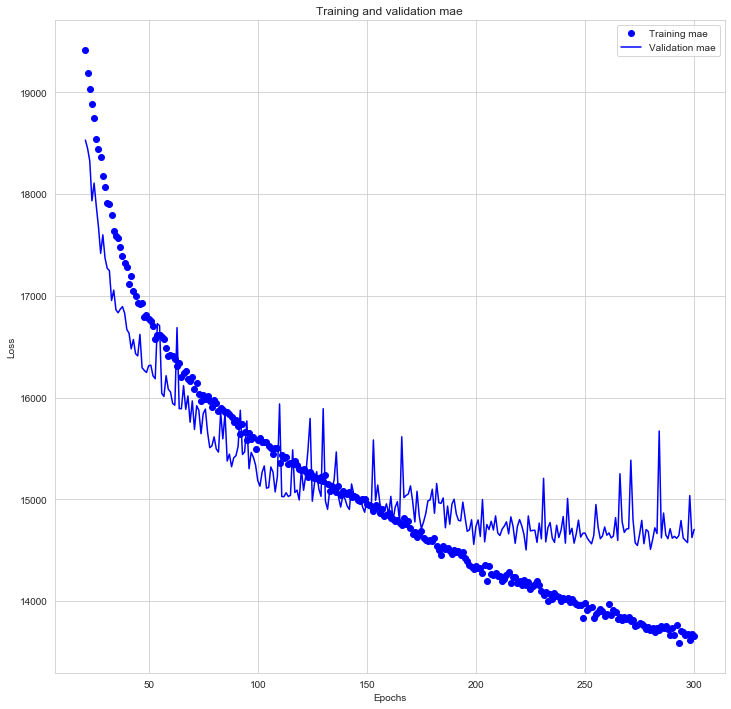

In [95]:
mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(mae) + 1)

plt.figure(figsize=(12, 12))
plt.plot(epochs[20:], mae[20:], 'bo', label='Training mae')
plt.plot(epochs[20:], val_mae[20:], 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [96]:
y_pred_model = model.predict(test_to_model)

In [97]:
model_pred = []

for pred in range(len(y_pred_model.tolist())):
    model_pred.append(y_pred_model.tolist()[pred][0])

In [98]:
model_pred[:10]

[122915.921875,
 168880.921875,
 184338.390625,
 200254.171875,
 174023.546875,
 168693.40625,
 186323.59375,
 162795.5,
 180179.453125,
 125004.890625]

In [99]:
ensemble[:10]

array([125167.54993577, 163887.30954573, 184271.09307868, 195711.03053976,
       196776.18941606, 174856.94858755, 178079.95080554, 164901.90392962,
       182155.37363458, 123656.84254232])

In [100]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = model_pred
sub.to_csv('submission_NN_300420.csv',index=False)

In [101]:
model_pred = np.array(model_pred)
model_pred

array([122915.921875, 168880.921875, 184338.390625, ..., 173047.453125,
       111104.765625, 218512.921875])

In [102]:
final_blend = ensemble * 0.5 + model_pred * 0.5

In [103]:
final_blend[:10]

array([124041.73590539, 166384.11571036, 184304.74185184, 197982.60120738,
       185399.86814553, 171775.17741877, 182201.77227777, 163848.70196481,
       181167.41337979, 124330.86658366])

In [104]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = final_blend
sub.to_csv('submission_blend_NN_300420.csv',index=False)